In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import struct
import sys
from array import array
import itertools
import os
import sys
from scipy import signal
from scipy.optimize import curve_fit
import subprocess
import shutil

pi = np.pi
clight = 299792458

In [2]:
working_folder = 'eSR/1RF_1type/Allow_thetaL/'
home = os.getcwd()
cwd = os.path.join(home,working_folder)

In [3]:
home

'/home/txin/Dropbox/code/Cpp/APES_pack/APES8.2'

In [4]:
inputfile = 'input0.txt'
inputfile = os.path.join(cwd,inputfile)
tempinput = {}
with open(inputfile) as inputfile:
    for line in inputfile:
        if len(line.split())>1:
            tempinput[line.split()[0]] = line.split()[1:]
for i in tempinput:
    for j in range(len(tempinput[i])):
        tempinput[i][j] = float(tempinput[i][j])

In [5]:
nRF = int(tempinput['nRF'][0])
nRF1 = int(tempinput['nRF1'][0])
nRF2 = int(tempinput['nRF2'][0])
nRFc = int(tempinput['nRFc'][0])

E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
nTurns = int(tempinput['n_turns'][0])
nfill = int(tempinput['n_fill'][0])
n_q_ramp = int(tempinput['n_q_ramp'][0])
NpRF = int(tempinput['N_bins'][0])
h = [int(i) for i in tempinput['h']]
detune_ini = np.array([i for i in tempinput['detune_ini']])
detune_final = np.array([i for i in tempinput['detune_final']])

step = int(tempinput['step_store'][0])
fill_step = int(tempinput['fill_step'][0])
nBeam = int(tempinput['nBeam'][0])
beam_shift = int(tempinput['beam_shift'][0])
nBunch = int(tempinput['n_bunches'][0])
nPar = int(tempinput['Npar'][0])
NperBunch = int(tempinput['NperBunch'][0])
nTot = nBunch*nPar*nBeam
Gamma0 = tempinput['Gamma'][0]
Rring = tempinput['R'][0]
n_record = nTurns/step
clight = 299792458
beta = np.sqrt(1-1/Gamma0**2)
T0 = 2*np.pi*Rring/(clight*beta)
f0 = 1/T0
V0 = [i for i in tempinput['Vref_I']]
V0Q = [i for i in tempinput['Vref_Q']]
II = [i for i in tempinput['Iref_I']]
IQ = [i for i in tempinput['Iref_Q']]
mainRF = int(tempinput['mainRF'][0])
if int(tempinput['type'][0]==2):
    atomicZ = 79
    Ek = Gamma0*E0Au
else:
    atomicZ =1
if int(tempinput['type'][0]==1):  
    Ek = Gamma0*E0Elec
    
GMTSQ = tempinput['GMTSQ'][0]
Ek_damp = tempinput['Ek_damp'][0]

eta = 1/GMTSQ-1/Gamma0**2
Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

omegarf = 2*np.pi*(np.array(h)*f0)
omegac = 2*np.pi*(np.array(h)*f0+detune_final)
Trf = 2*np.pi/omegarf
RoQ = [i for i in tempinput['RoQ']]
QL = [i for i in tempinput['QL']]
R = [RoQ[i]*QL[i] for i in range(nRF)]

Th = 2*np.pi/omegarf[0]
dthat =Th/NpRF

pattern = 'd'+'dd'*nBeam+3*nRF*'d'
n_stride = 1+2*nBeam+3*nRF
stride = len(pattern)*8
test = array('d')
bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0

print(bucket_height)
print(Ek)
print(Qs)

269.5526272455529
10015579420.0
0.054094713315449496


Vnew :  1692857.1428571427
QL :  30533.268101761252
Phis :  171.8853766253657  [degree]
PhisNew :  171.8853766253657  [degree]
PhisIQ :  -98.1146233746343  [degree]
Tan(PhisPhasor) :  7.013533551694804
PhisPhasorNew :  81.88537662536568
detune tan :  7.701797753665687
detune angle :  82.60211341862001  [degree]
VIF :  23462707.632271964
VQF :  -3345347.5996564147
VID :  0.0
VQD :  -0.0
II :  1.5775644371266349
IQ :  0.2607504461508458
II_ini :  0.7856911289480161
IQ_ini :  0.12986430702197146
Vsynch_need :  3345347.5996564194
Vsynch_new :  3345347.599656419
Vquard_need :  -23462707.63227196
Vquard_new :  -23462707.63227196
IbDC :  2.7114719382367154
delta_f :  -74563.13236939907  [Hz]
Creation of the directory /home/txin/Dropbox/code/Cpp/APES_pack/APES8.2/eSR/1RF_1type/Allow_thetaL/2.71A failed
b'type\ndynamicOn\nn_dynamicOn\nn_per_show\nturn_start\nn_turns\nn_bunches\nn_fill\nn_q_ramp\nn_detune_start\nn_detune_ramp\nn_detune_ramp_tot\nn_I_ramp_start\nn_I_ramp_end\nmainRF\nmain_detune\

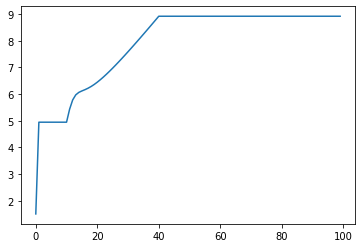

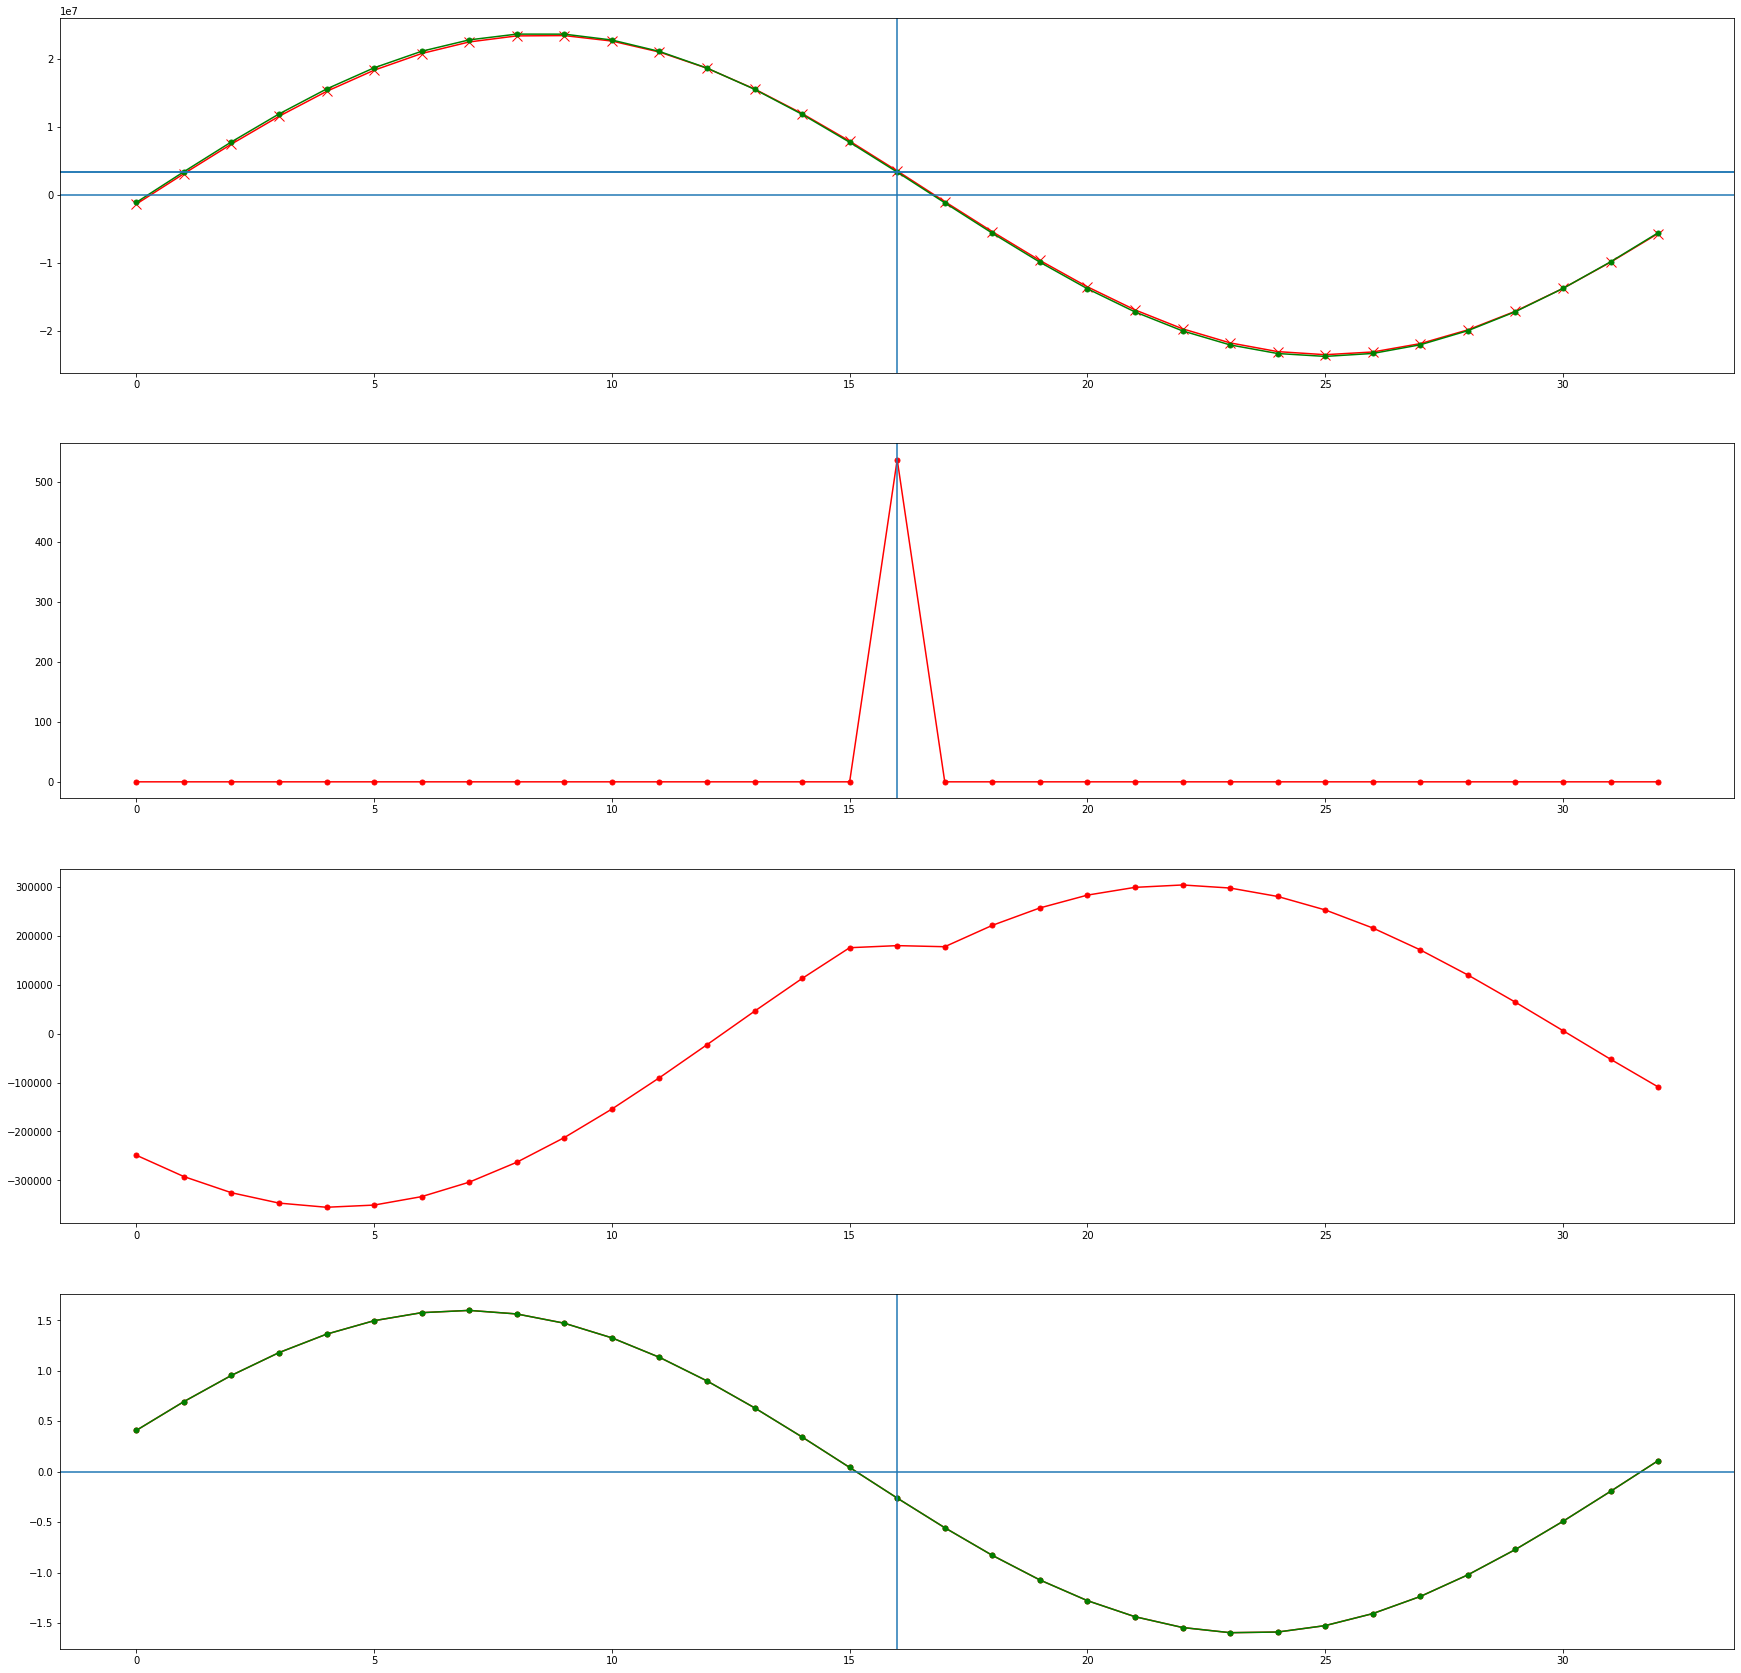

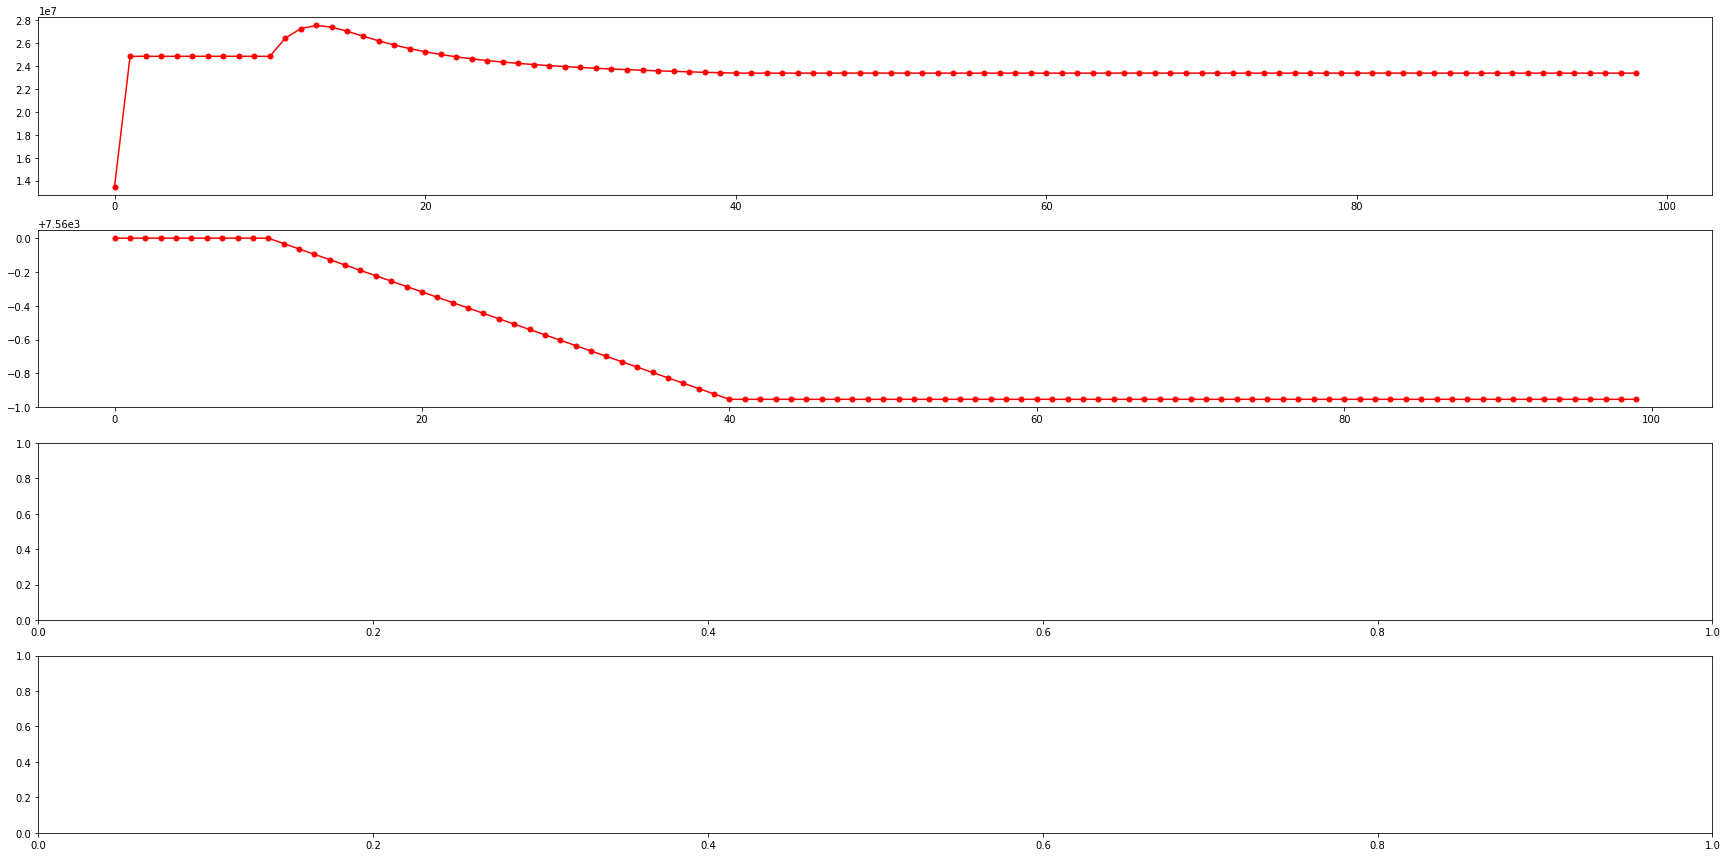

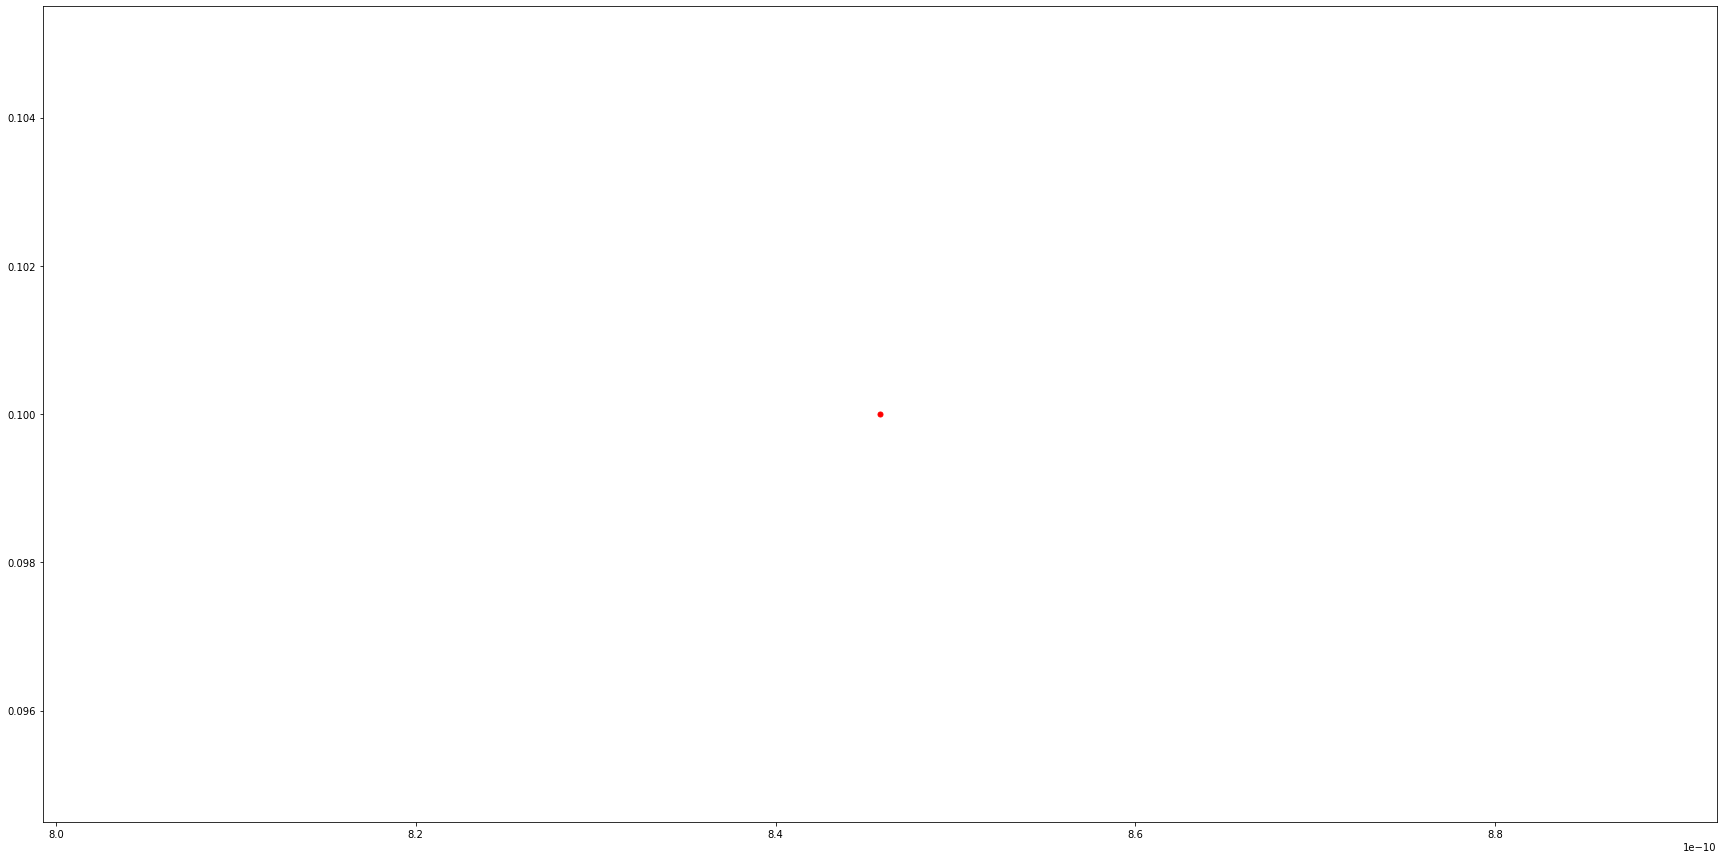

0.0
0.0
0.0


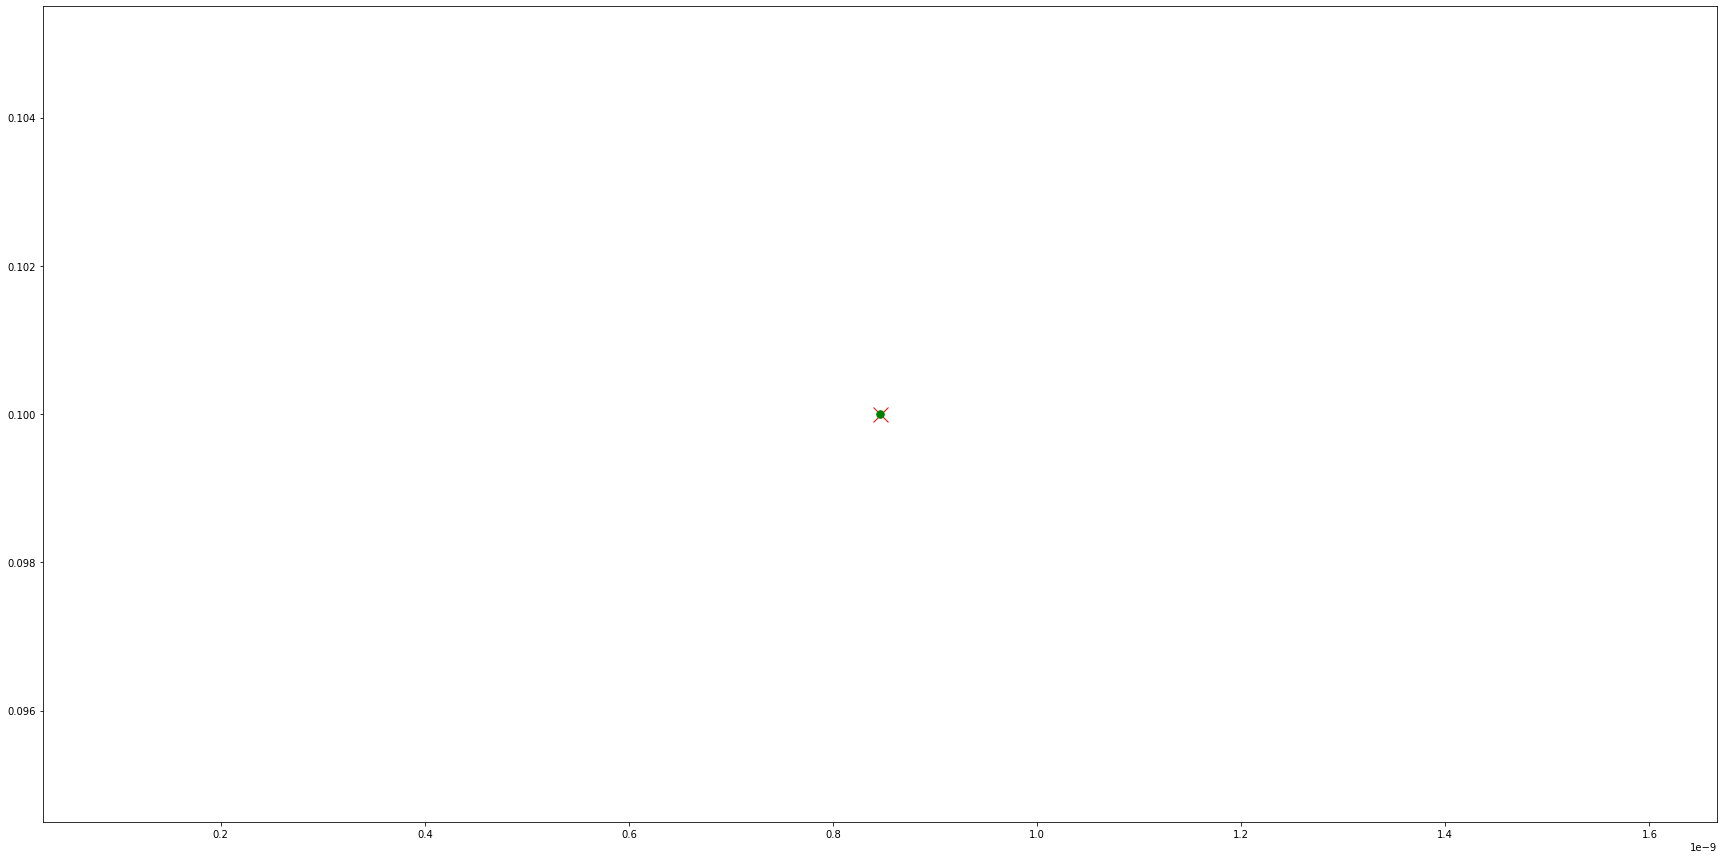

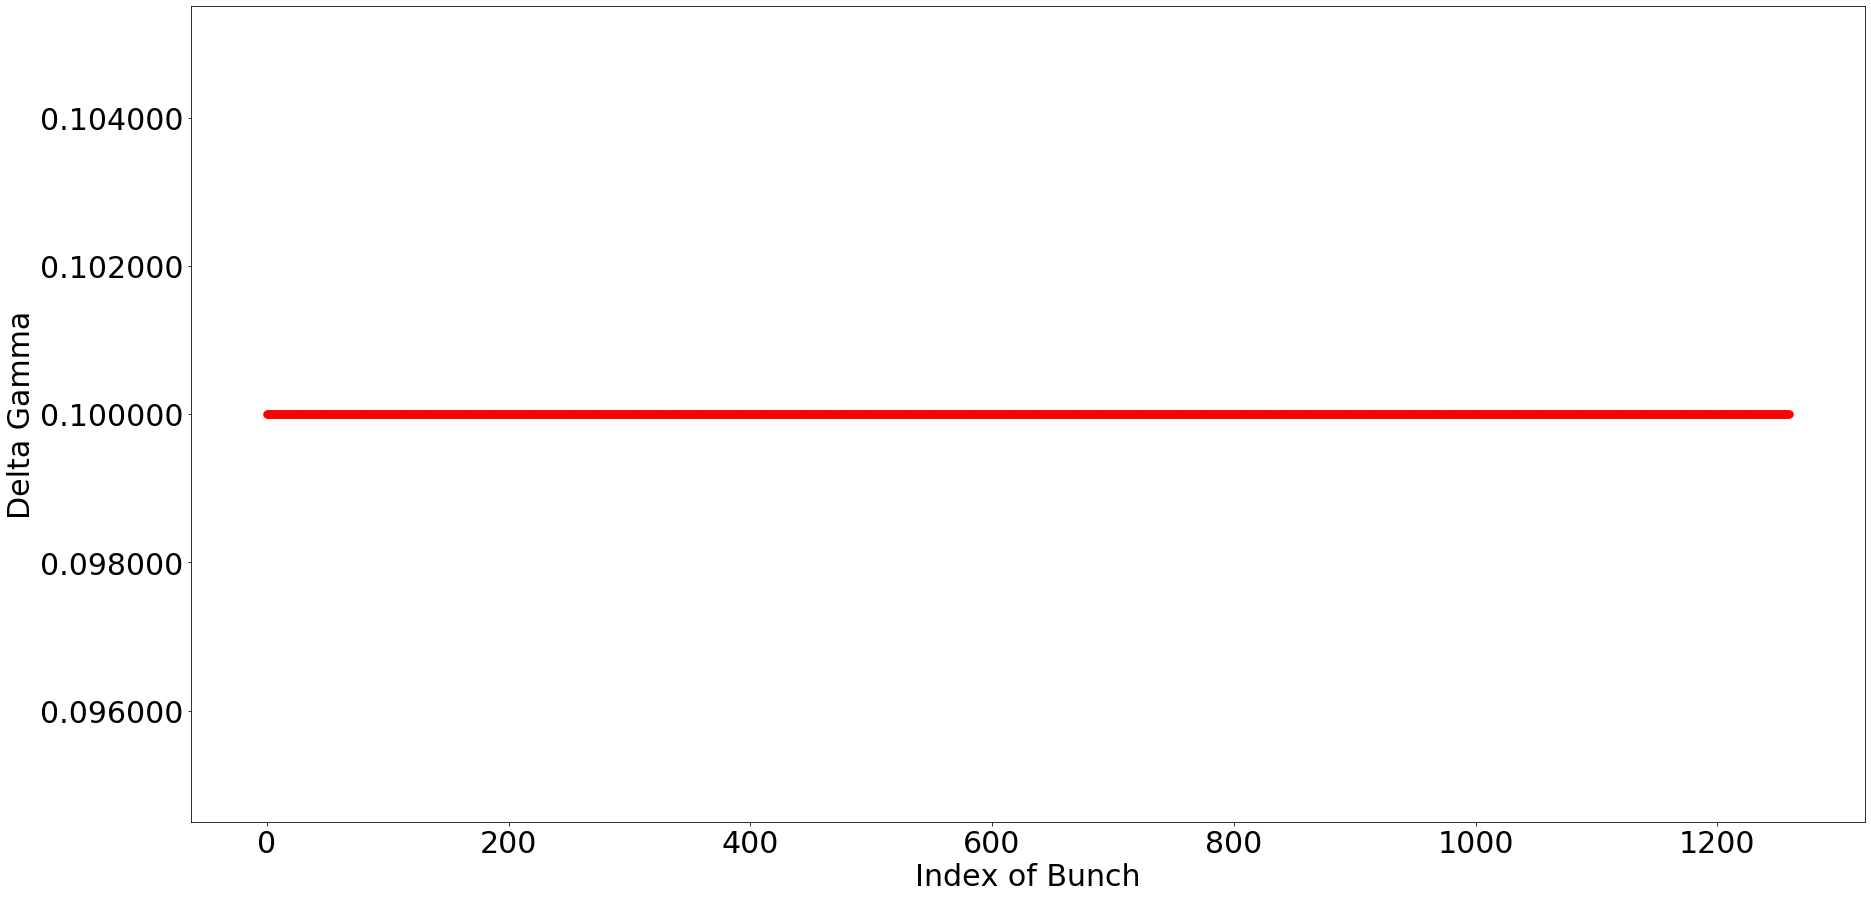

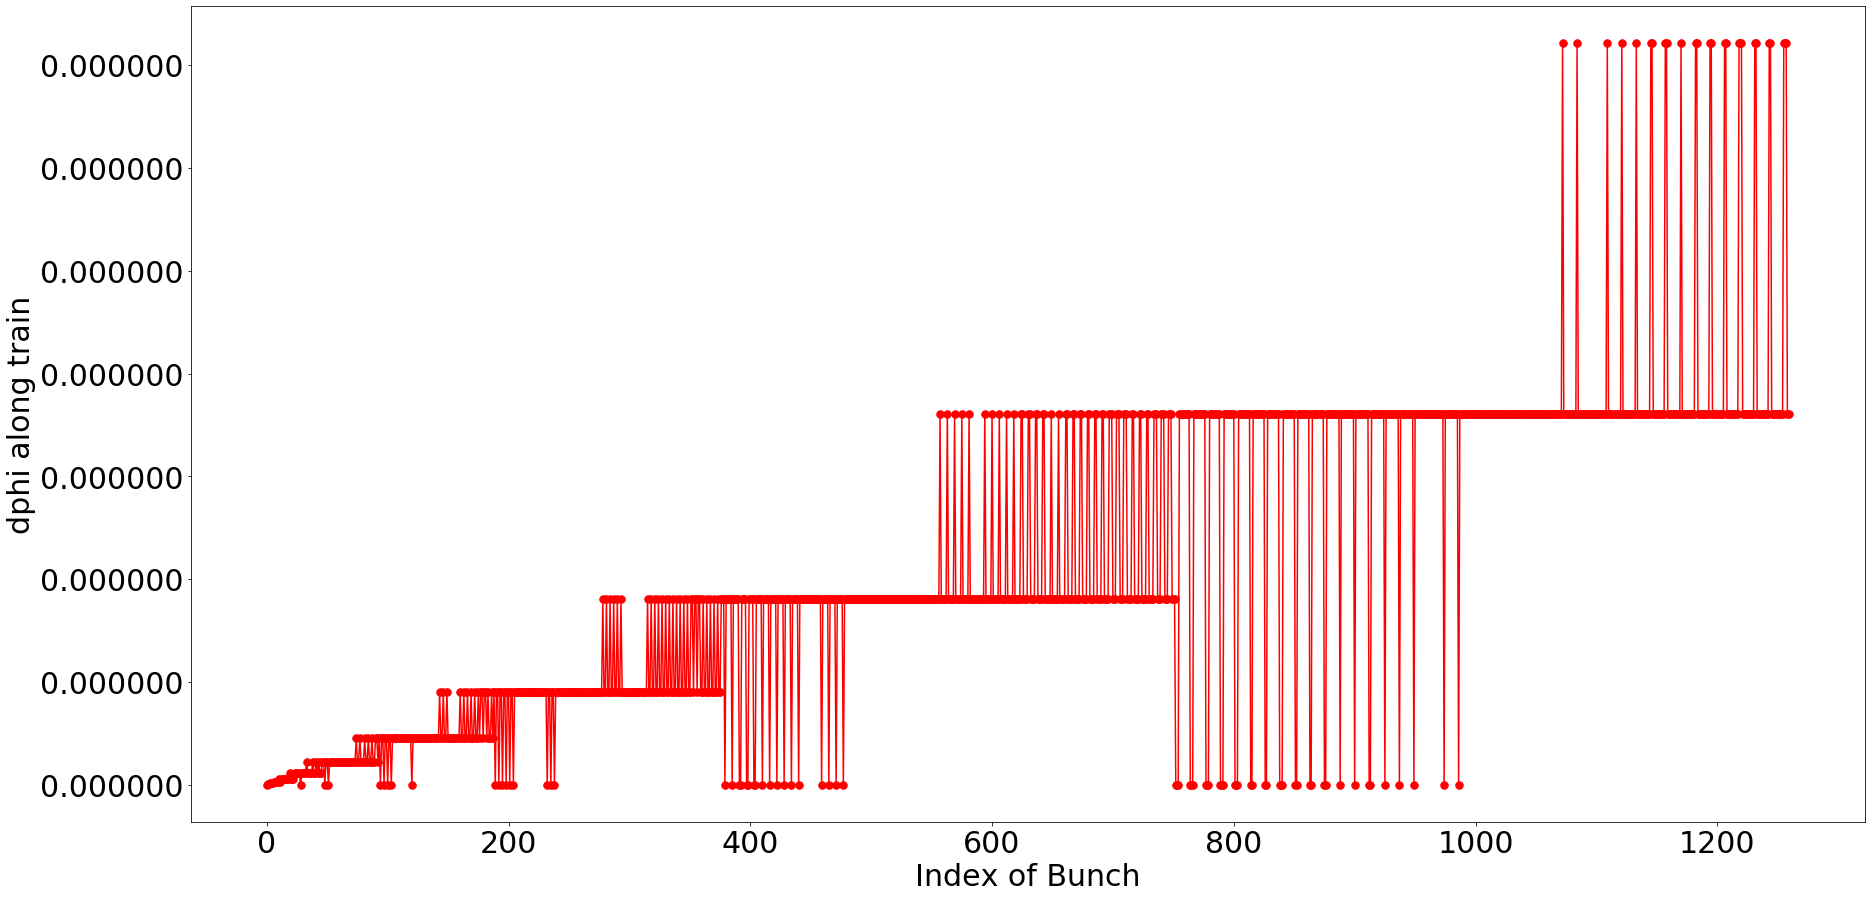

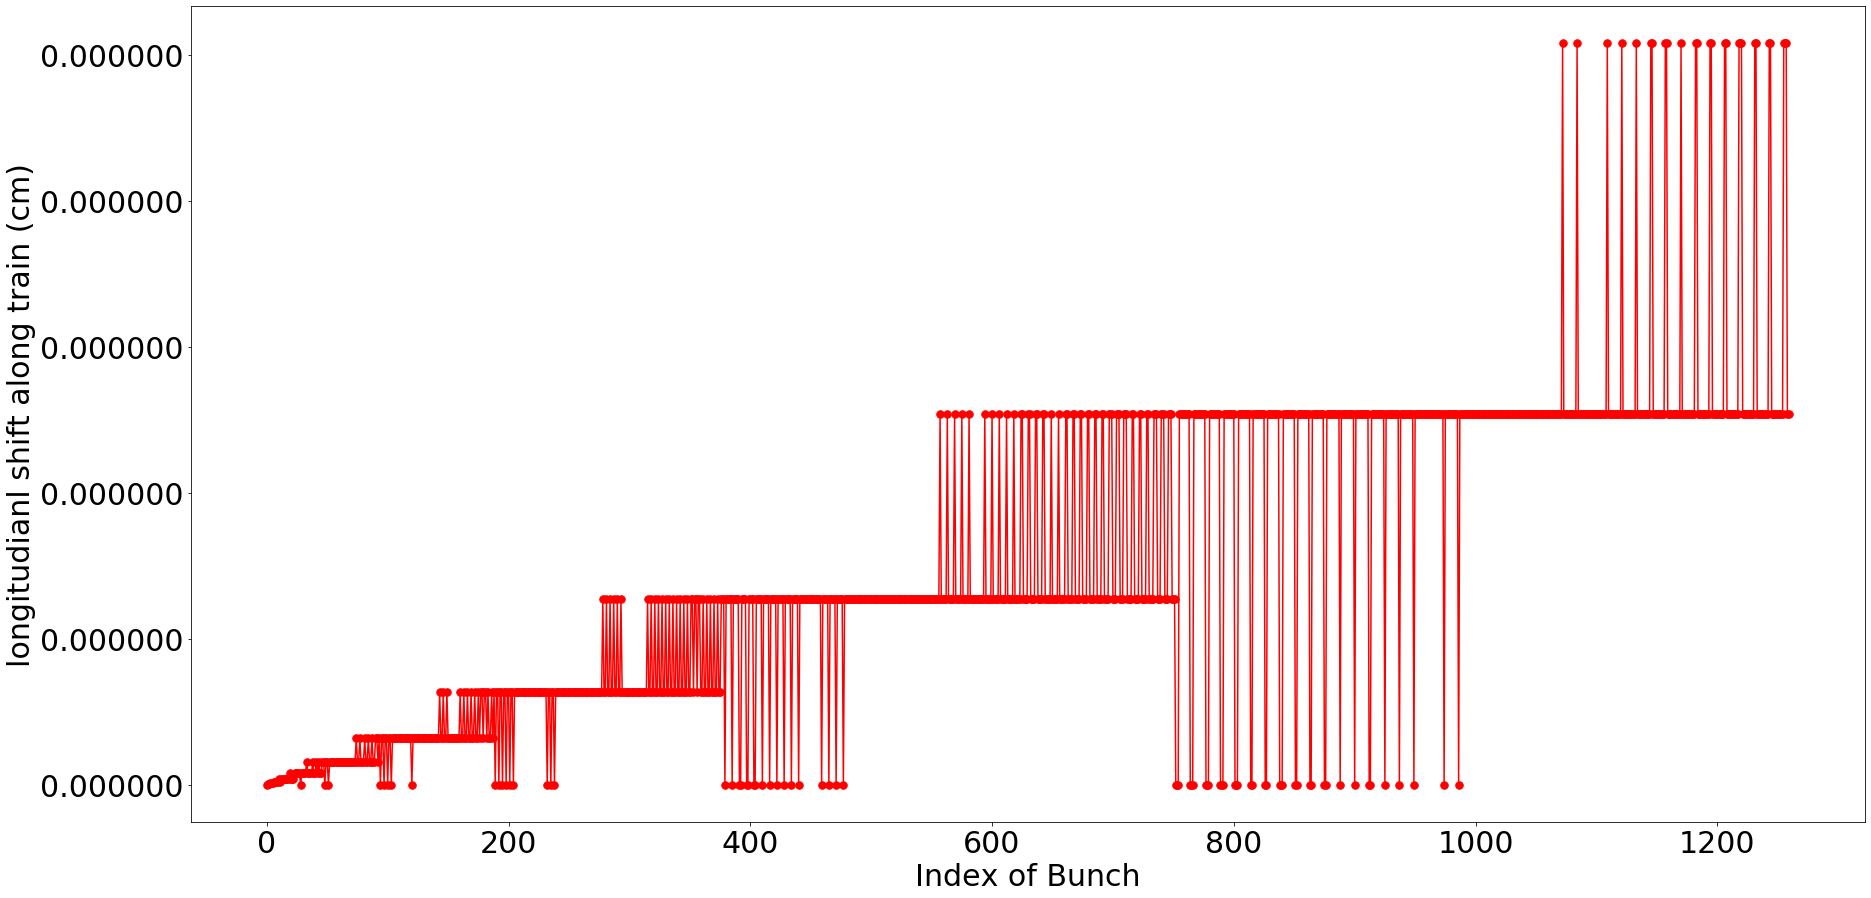

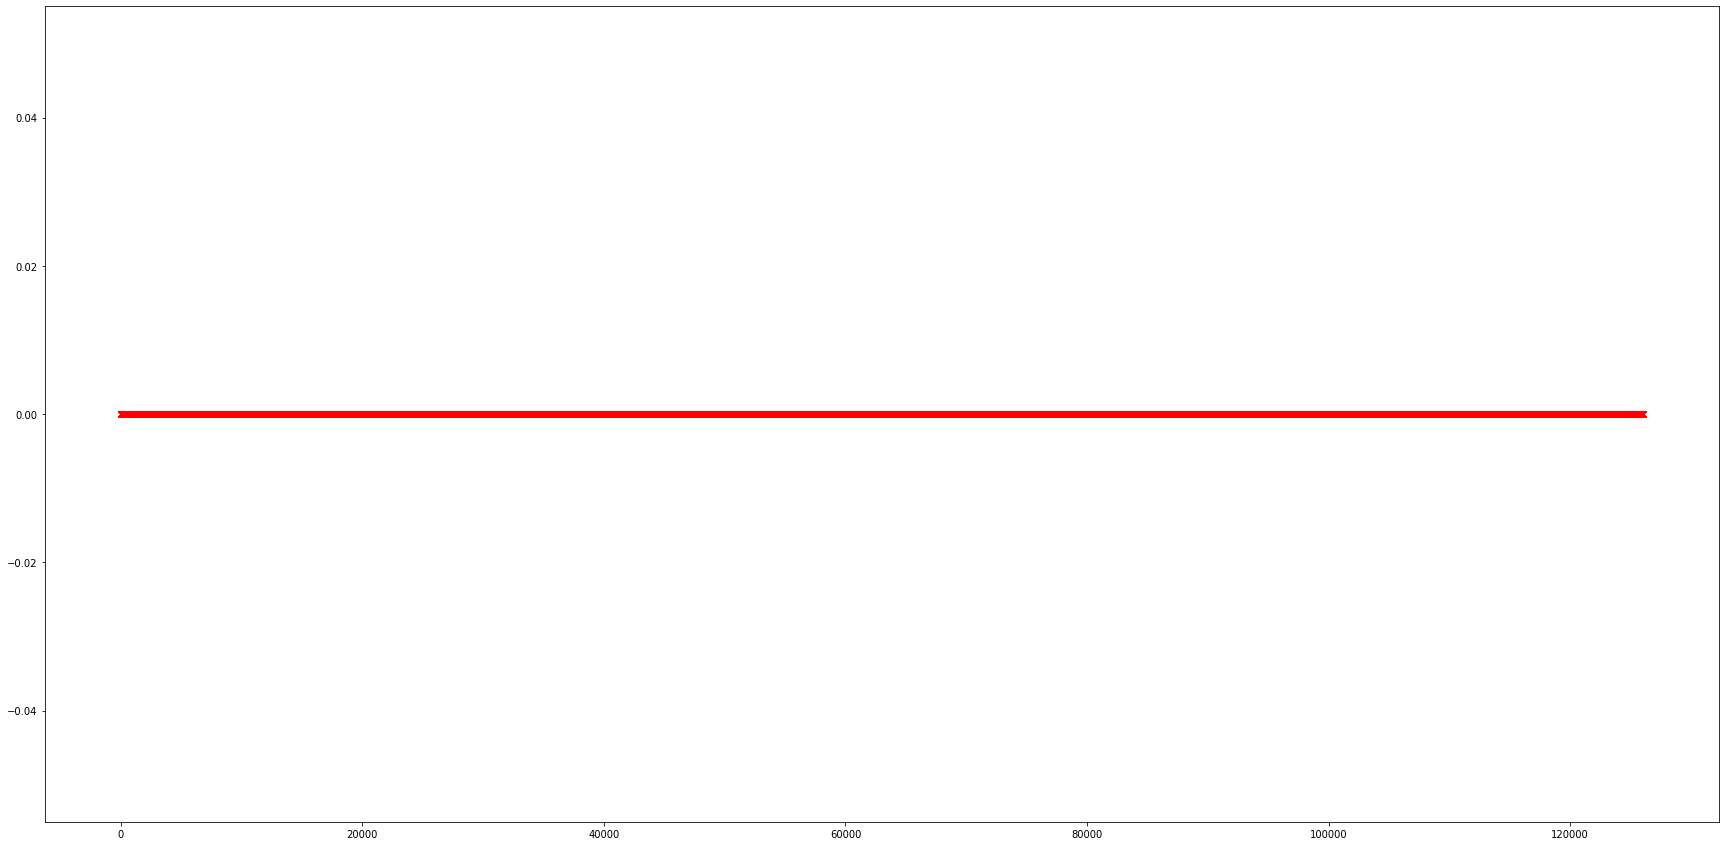

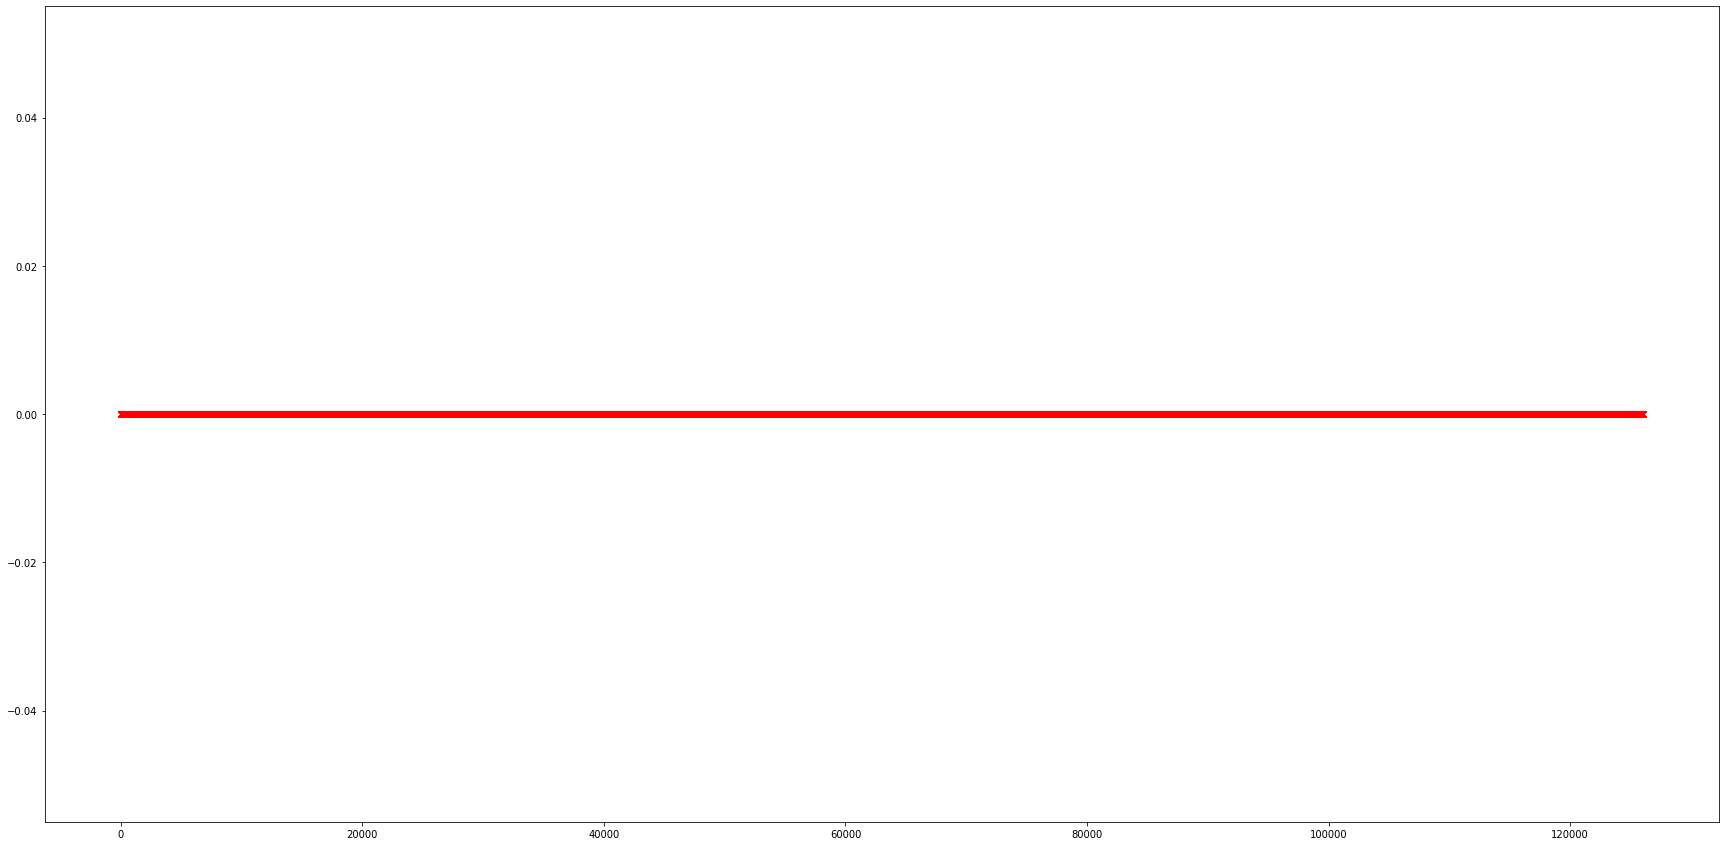

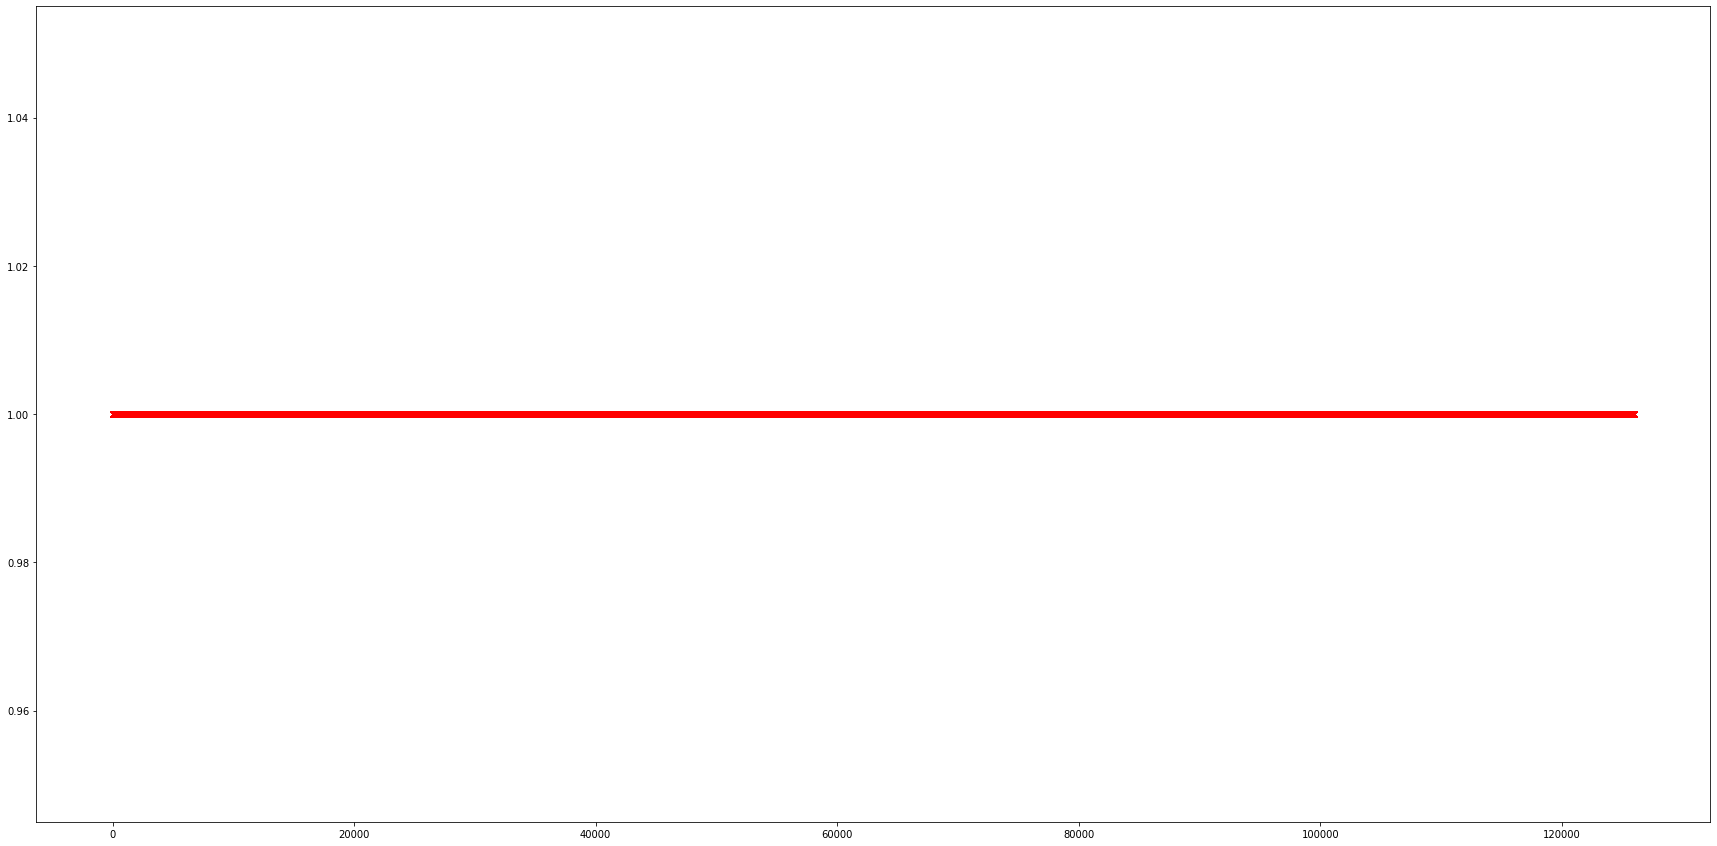

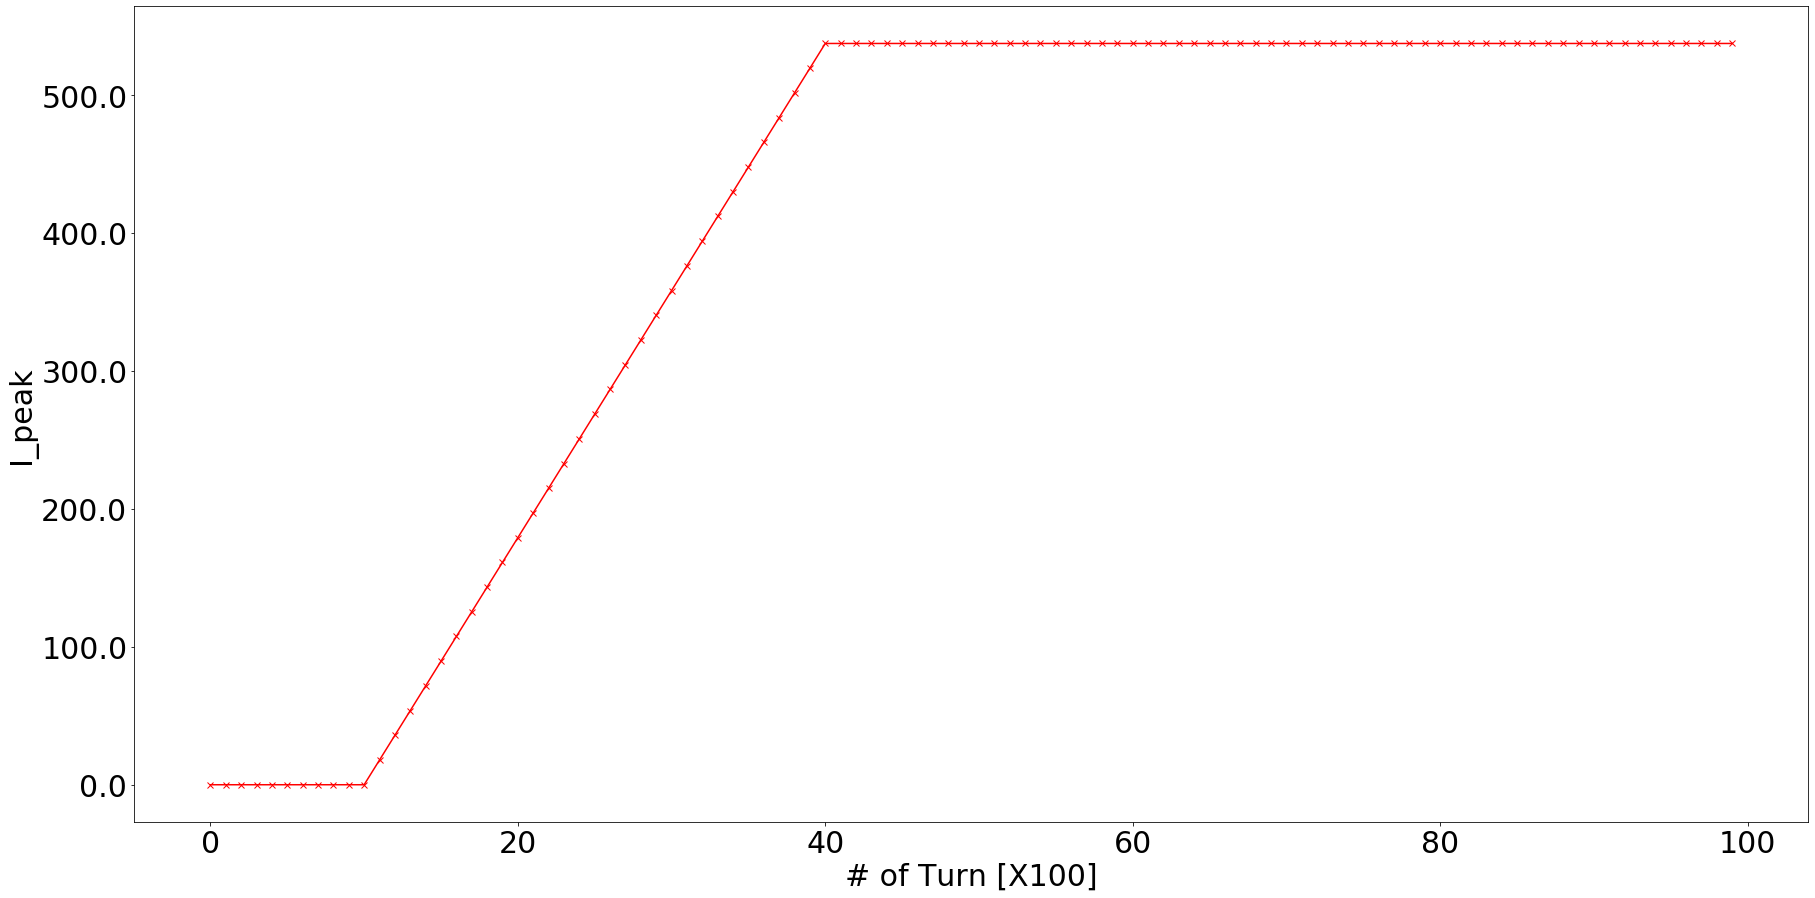

33651.198193665805
0.9468958805585509
eta =  0.001040580123244694
Qs =  0.05415764254104801
f0 =  78196.2883627698
fs =  4234.9266331876


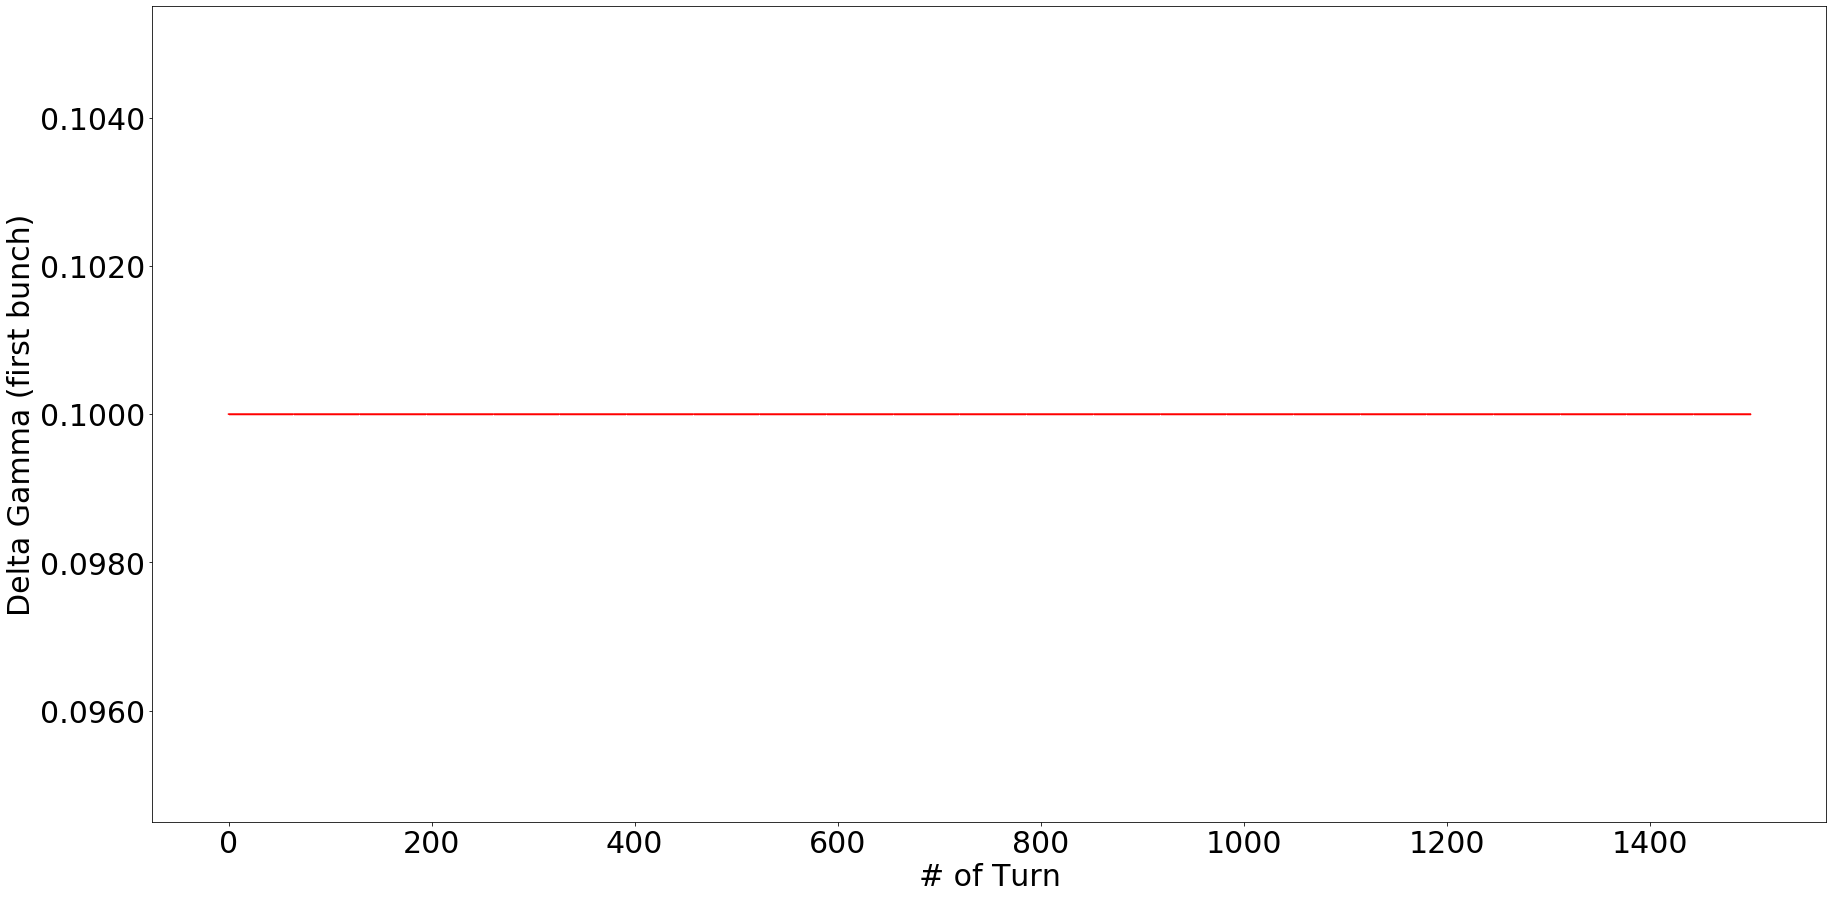

4234.9266331876
0.05415764254104801


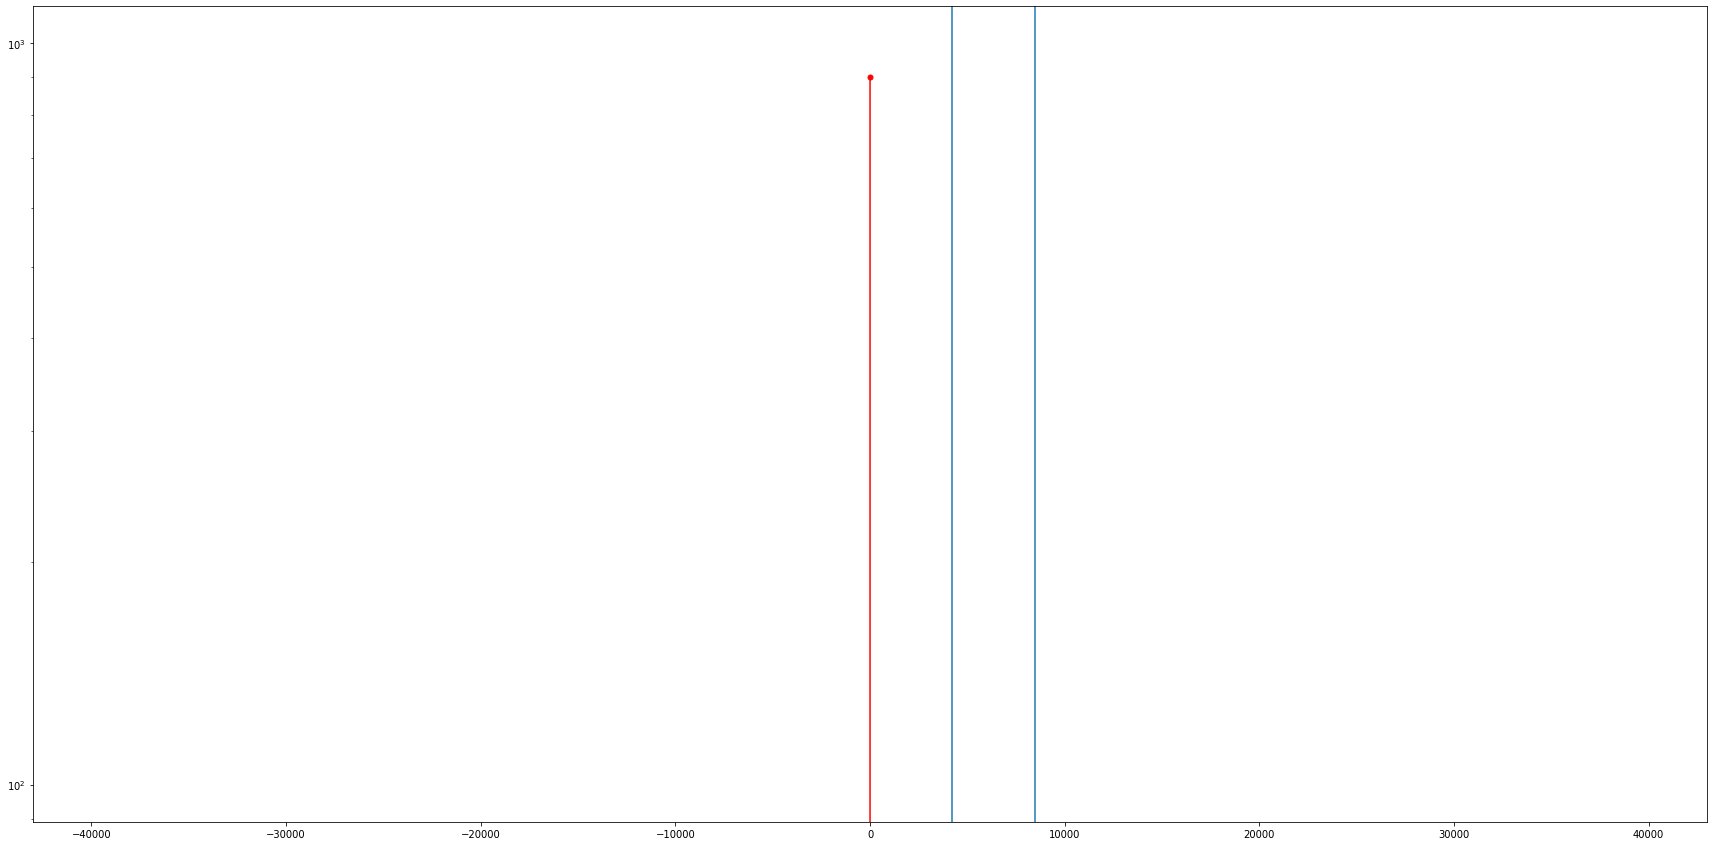

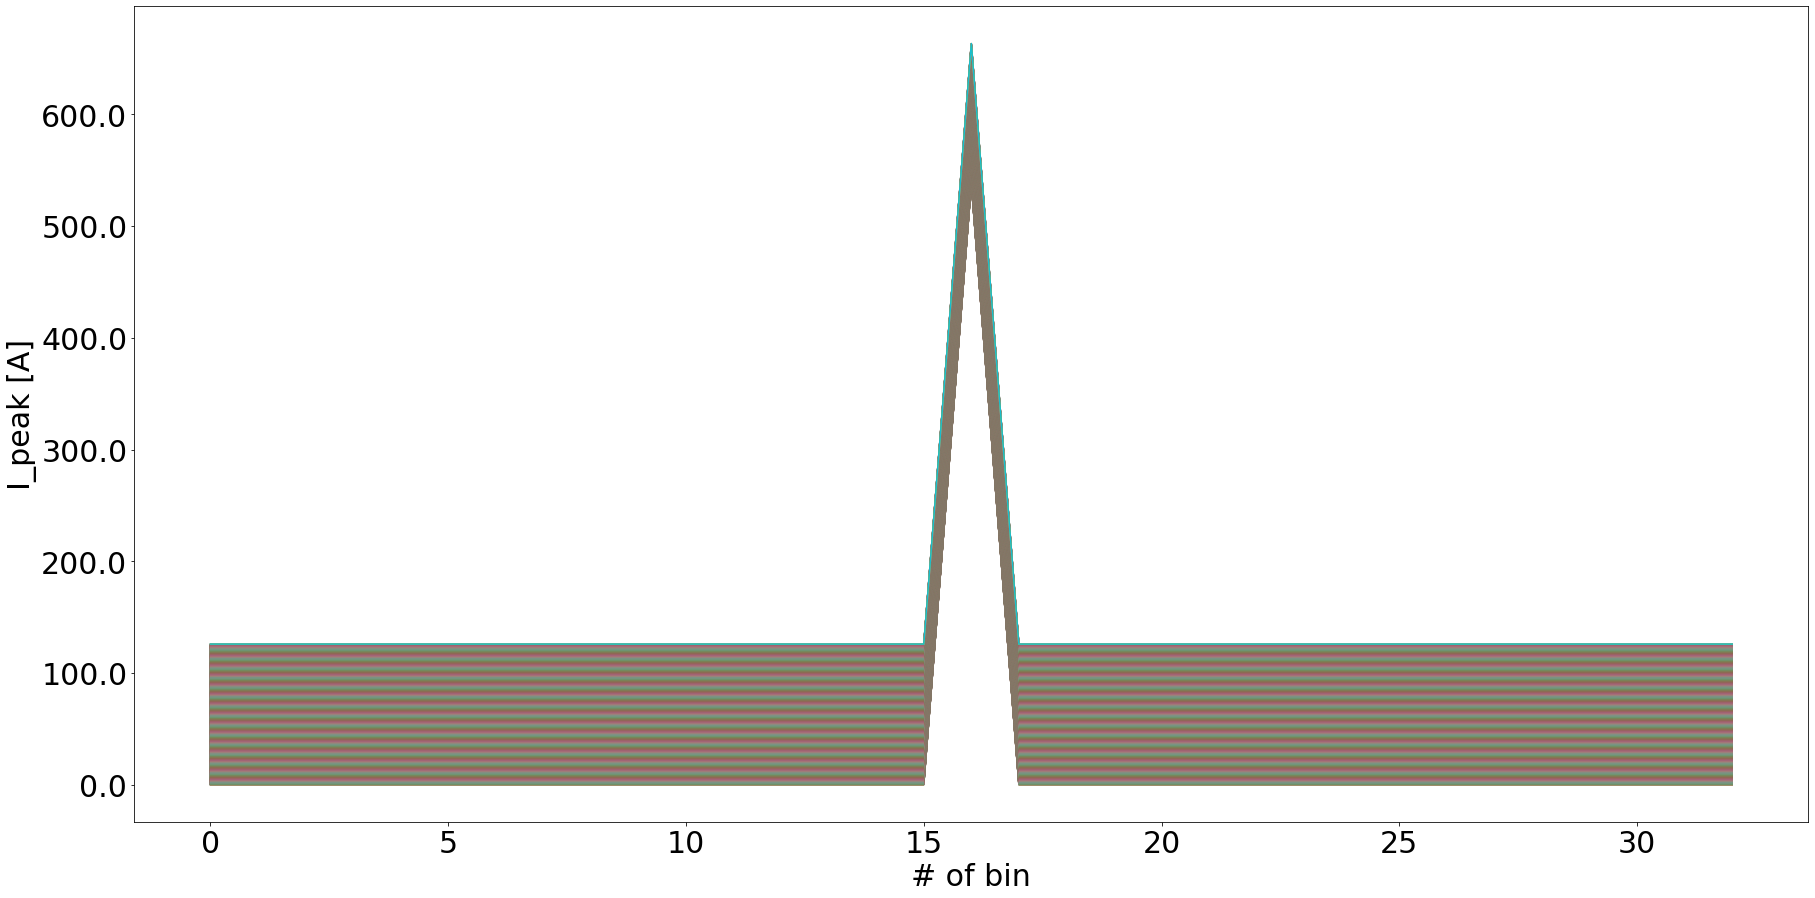

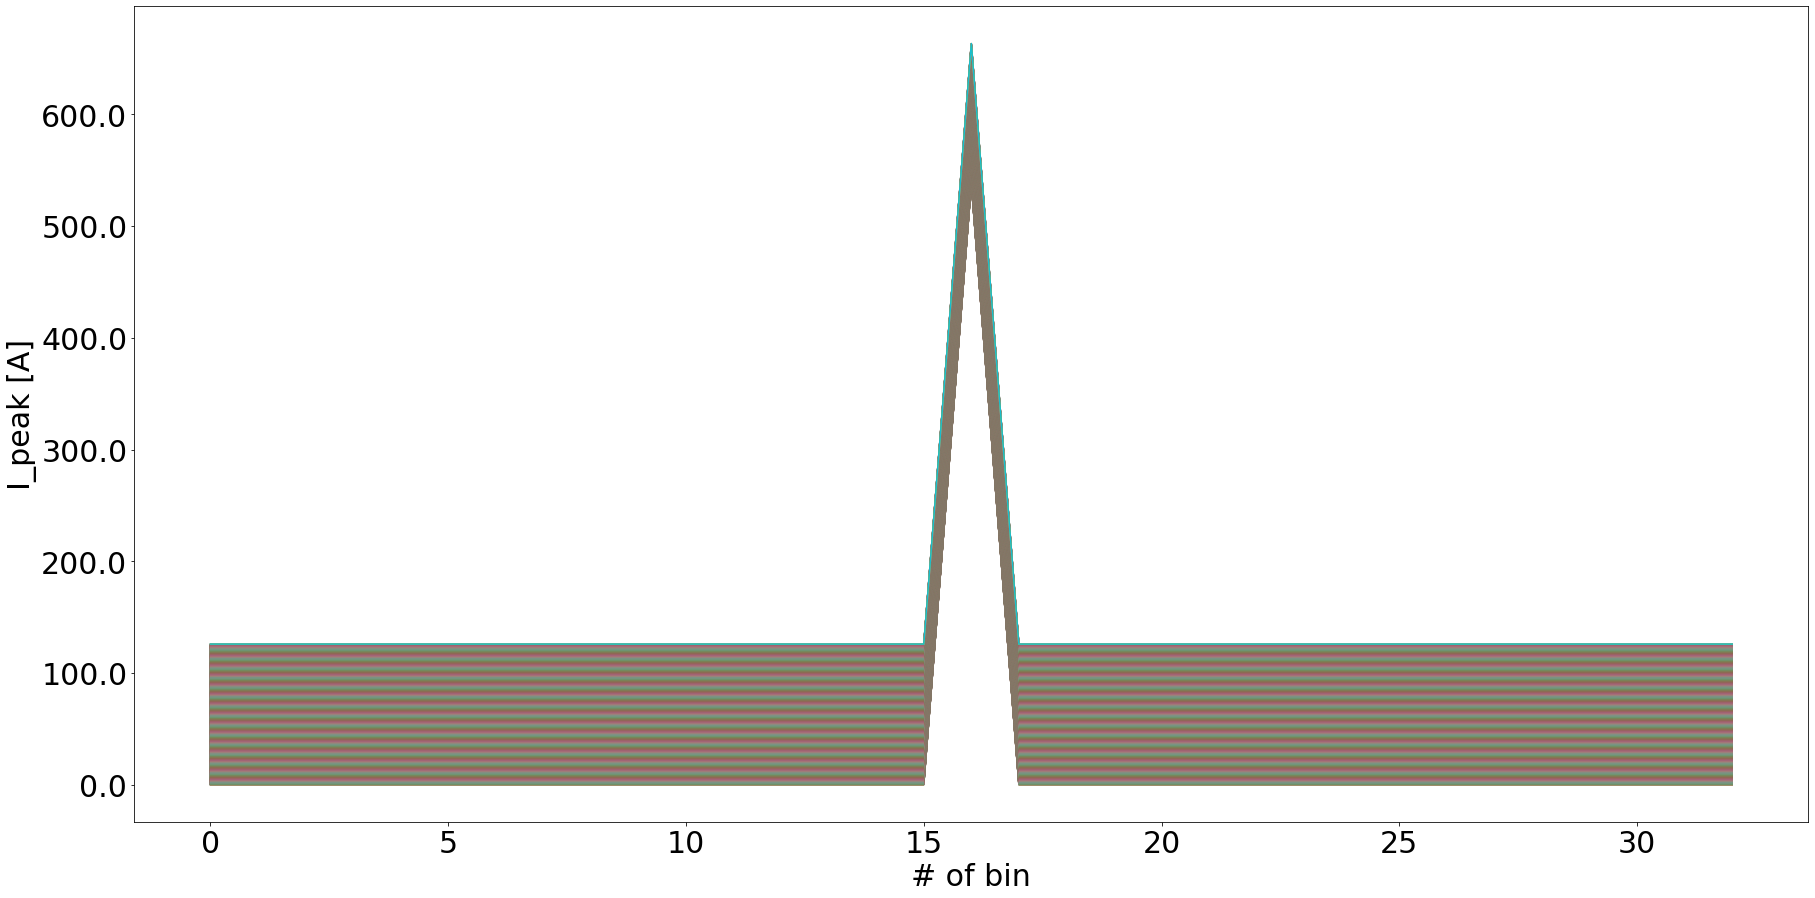

In [145]:
nSample = 1
for charge_factor in range(nSample):
    # arguments
    ParType = 1 # 0 means proton, 1 means electron, 2 means gold

    mainRF = 0
    main_detune = 0
    detune_slow_factor = 1

    
    nTurn = 10000
    step_store = 100
    n_record = nTurns/step_store

    n_dynamic = 15000

    n_fill = 1000
    n_q_ramp = 3000
    n_detune_start = 1000
    n_detune_ramp = 4000
    n_detune_ramp_tot = 4000 # last turn of detuning process
    
    n_I_ramp_start = 1000
    n_I_ramp_end = 4000
    R_ring = 610.1754 
    GMTSQ = 961.0 
    Gamma0 = 19600.0 
    Prad0 = 9e6


    t_rad_long = 1000 # 0.05486 
    siglong = 1e-6#30.76 # 30.76
    Ek_damp = 0.5

    nRF = 1
    nRF1 = 1.0 
    nRFc = 0.0 
    nRF2 = 0.0 

    nCav = 14.0
    h = 7560.0 
    RoQ = 73 # RoQ per cavity
    gII = 0.0 
    gQQ = 0.0 
    nBunch = 1260
    nPar0 = 17.2e10
    nPar = 17.2e10/nSample*(charge_factor+1)
    Prad = Prad0*nPar/nPar0
    
    N_macro = 1
    nBins = 33
    NC = 14
    NF = 14
    ND = NC-NF
    V0 = 23.7e6/NC
    # with beam, with drive, with detune.
    Urad0 = Prad/(nBunch*nPar*1.6e-19*f0) # radiation caused Voltage
    U_loss = Urad0+2*pi*h*f0*RoQ*NC/4*nPar*1.6e-19
    Vtot = 23.7e6 # total voltage 

    Phis = np.arccos(U_loss/Vtot)+90/180*pi #171/180*pi            # synchronous phase in pCDR, in sin(wt+phis) convention. 
    PhisNew = Phis-pi            # convert it to the phase used in my code, where I put the bunch at Trf/2, so we should subtract 'pi' from it.
                                 # but this is still the phase for sin convention, to convert it so that can be used in my I Q calculation, need to 
                                 # subtract another pi/2
    PhisPhasor = Phis-pi/2
    Vsynch_need = V0*np.sin(Phis)
    Vquard_need = V0*np.cos(Phis)

    Vnew = np.sqrt(Vsynch_need**2+(NC/(NF-ND)*Vquard_need)**2) # new cavity voltage per cavity, assuming the new phiSynch are the same (different sign) between two types of cavity
    # new synchronous phase if we change the number of focusing and defocusing cavity.
    PhisPhasorNew = np.arctan(NC/(NF-ND)*np.tan(PhisPhasor))
    PhisNew = PhisPhasorNew+pi/2
    ####################################
    # Important convert
    ####################################
    PhiIQ = PhisNew-pi/2-pi

    Pbeam0 = 9e6/NC # beam power per cavity

    Pbeam = 9e6*nPar/nPar0/NC # beam power per cavity
    RoQacc = RoQ*2
    IbDC = nBunch*nPar*1.6e-19*f0
    f = 7560*f0

    Qbeam = Vnew**2/(RoQacc*Pbeam)
    Rsh = RoQ*Qbeam
    
    # consider the case with loading angle
    thetaL = 17.5/180*pi # angle between Ig and Vc
    PhiIQIg = PhisNew-pi/2-pi+thetaL
    tgPhi = np.abs(RoQ*Qbeam*IbDC*2*np.sin(PhisPhasorNew)/Vnew+(1+RoQ*Qbeam*IbDC*2*np.cos(PhisPhasorNew)/Vnew)*np.tan(thetaL))
    delta_f = f-f*(tgPhi/2/Qbeam+np.sqrt((tgPhi/2/Qbeam)**2+1))#-f*tgPhi/2/Qbeam

    V_IF = -Vnew*NF*np.sin(PhiIQ)
    V_QF = Vnew*NF*np.cos(PhiIQ)
    V_ID = -Vnew*ND*np.sin(PhiIQ)
    V_QD = Vnew*ND*np.cos(PhiIQ)
    
    I_g = Vnew/Rsh*np.cos(thetaL)*(1+np.tan(thetaL)*tgPhi)+IbDC*2*np.cos(thetaL)*np.cos(PhisPhasorNew)*(1-np.tan(thetaL)*np.tan(PhisPhasorNew))
    
    I_I = -I_g*np.sin(PhiIQIg) 
    I_Q = I_g*np.cos(PhiIQIg)
    I_I_ini = -Vnew/(RoQ*Qbeam)/np.cos(thetaL)*np.sin(PhiIQIg)
    I_Q_ini = Vnew/(RoQ*Qbeam)/np.cos(thetaL)*np.cos(PhiIQIg)
    #I_I = -2*IbDC*(tgPhi+np.tan(PhisPhasorNew))/tgPhi*np.cos(PhisPhasorNew)/np.cos(thetaL)*np.sin(PhiIQIg) # becareful not to forget the factor of '2'
    #I_Q = 2*IbDC*(tgPhi+np.tan(PhisPhasorNew))/tgPhi*np.cos(PhisPhasorNew)/np.cos(thetaL)*np.cos(PhiIQIg)
    #I_I_ini = -Vnew/(RoQ*Qbeam)/np.cos(thetaL)*np.sin(PhiIQIg)
    #I_Q_ini = Vnew/(RoQ*Qbeam)/np.cos(thetaL)*np.cos(PhiIQIg)

    print("Vnew : ",Vnew)
    print("QL : ",Qbeam)
    print("Phis : ",Phis/pi*180, " [degree]")

    print("PhisNew : ",PhisNew/pi*180, " [degree]")
    print("PhisIQ : ",PhiIQ/pi*180, " [degree]")
    print("Tan(PhisPhasor) : ",np.tan(PhisPhasor))
    print("PhisPhasorNew : ",PhisPhasorNew/pi*180)

    print("detune tan : ", tgPhi)
    print("detune angle : ", np.arctan(tgPhi)/pi*180, " [degree]")
    print("VIF : ",V_IF)
    print("VQF : ",V_QF)
    print("VID : ",V_ID)
    print("VQD : ",V_QD)
    print("II : ",I_I)
    print("IQ : ",I_Q)
    print("II_ini : ",I_I_ini)
    print("IQ_ini : ",I_Q_ini)

    print("Vsynch_need : ", Vsynch_need*NC)
    print("Vsynch_new : ",Vnew*np.sin(PhisNew)*NC)
    print("Vquard_need : ", Vquard_need*NC)
    print("Vquard_new : ", Vnew*np.cos(PhisNew)*(NF-ND))
    print("IbDC : ", IbDC)
    print("delta_f : ",delta_f, " [Hz]")
    tempinput['n_turns'][0] = nTurn
    tempinput['step_store'][0] = step_store
    tempinput['n_fill'][0] = n_fill
    tempinput['n_q_ramp'][0] = n_q_ramp
    tempinput['n_detune_start'][0] = n_detune_start
    tempinput['n_detune_ramp'][0] = n_detune_ramp
    tempinput['n_detune_ramp_tot'][0] = n_detune_ramp_tot
    tempinput['n_I_ramp_start'][0] = n_I_ramp_start
    tempinput['n_I_ramp_end'][0] = n_I_ramp_end
    tempinput['n_dynamicOn'][0] = n_dynamic
    tempinput['Npar'][0] = N_macro
    tempinput['NperBunch'][0] = nPar
    tempinput['N_bins'][0] = nBins

    tempinput['n_bunches'][0] = nBunch
    tempinput['QL'][0] = Qbeam
    tempinput['Prad'][0] = Pbeam*NC
    tempinput['Vref_I'][0] = V_IF
    tempinput['Vref_Q'][0] = V_QF
    tempinput['Iref_I'][0] = I_I
    tempinput['Iref_Q'][0] = I_Q
    tempinput['I_I_ref_ini'][0] = I_I_ini
    tempinput['I_I_ref_final'][0] = I_I
    tempinput['I_Q_ref_ini'][0] = I_Q_ini
    tempinput['I_Q_ref_final'][0] = I_Q
    tempinput['gII'][0] = gII
    tempinput['gQQ'][0] = gQQ

    tempinput['detune'][0] = 0
    tempinput['detune_ini'][0] = 0
    tempinput['detune_mid'][0] = delta_f/2
    tempinput['detune_final'][0] = delta_f
    tempinput['siglong'][0] = siglong
    tempinput['Ek_damp'][0] = Ek_damp
    path = os.path.join(cwd,"{0:.2f}A".format(nBunch*nPar*f0*1.6e-19))
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s" % path)
    os.chdir(path)
    
    fn1 = 'input.txt'
    inputfile1 = os.path.join(path,fn1)
    with open(inputfile1,'w') as wrt_to_input:
        for i in tempinput:
            wrt_to_input.write(str(i)+' ')
            #print(i)
            for j in range(len(tempinput[i])):
                wrt_to_input.write(str(tempinput[i][j])+' ')
                #print(tempinput[i][j])
            wrt_to_input.write('\n')

    args = ("/home/txin/Dropbox/code/Cpp/APES_pack/APES8.2/APES")

    popen = subprocess.Popen(args, stdout=subprocess.PIPE,cwd=path)
    popen.wait()
    output = popen.stdout.read()
    print(output)
    datafile = 'data.bin'
    datafile = os.path.join(path,datafile)
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    E0Au = 196.9665687*931.5e6
    E0Elec = 0.51099895000e6
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    clight = 299792458
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0

    print(bucket_height)
    print(Ek)
    print(Qs)

    with open(datafile, mode='rb') as file: # b is important -> binary
        test.fromfile(file,int((n_stride)*nTurns/step*NpRF*h[0]))

    time = np.array(test[0::n_stride])
    Ibi = np.array(test[1::n_stride])
    #Ibi_1 = np.array(test[2::n_stride])
    Ibi2 = np.array(test[3::n_stride])

    V = []
    Ig = []
    #U = []
    Vref = []
    Iref = []
    Power = []
    for i in range(nRF):
        V.append(np.array(test[1+2*nBeam+0+i*3::n_stride]))
        Ig.append(np.array(test[1+2*nBeam+1+i*3::n_stride]))
        #U.append(np.array(test[1+2*nBeam+2+i*3::n_stride]))
        print(V0[i],V0Q[i])
        Vref.append(V0[i]*np.sin(omegarf[i]*time)+V0Q[i]*np.cos(omegarf[i]*time))
        Iref.append(II[i]*np.sin(omegarf[i]*time)+IQ[i]*np.cos(omegarf[i]*time))
        Power.append(V[i]*Ig[i])

    Power_average = 0.5*np.array([np.mean(Power[0][i*h[0]*NpRF:(i+1)*h[0]*NpRF]) for i in range(int(n_record))])
    plt.plot(Power_average/1e6)
    plt.show()

    startTurn =int(nTurns/step-1)
    startRF = 0 
    nRFsamp = 1

    rng1 = NpRF*(h[0]*startTurn+startRF)+int(3*NpRF/8)*0
    rng2 = NpRF*(h[0]*startTurn+startRF+nRFsamp)-int(3*NpRF/8)*0
    step1 = 1
    step2 = 1

    if nRF>1:
        fig1,axes1 = plt.subplots(4,nRF)
        for i in range(nRF):
            axes1[0][i].plot(V[i][rng1:rng2:step1],'r.-',ms=10)
            axes1[0][i].plot((Vref[i])[rng1:rng2:step1],'g.-',ms=10)
            axes1[0][i].axhline(y=0)
            axes1[0][0].axhline(y=3.7e6/14*8)
            axes1[0][1].axhline(y=3.7e6/14*6)
            #axes1[0][1].axhline(y=7.02e7)
            axes1[0][i].axvline(x=int(NpRF/2))
            axes1[1][i].plot(Ibi[rng1:rng2:step1],'r.-',ms=10)
            if nBeam == 2 :
                axes1[1][i].plot(Ibi2[rng1:rng2:step1],'g.-',ms=10)
            axes1[2][i].plot((V[i]-Vref[i])[rng1:rng2:step1],'r.-',ms=10)
            axes1[2][i].axvline(x=int(NpRF/2))
            #axes1[3][i].plot((Ig[i])[rng1:rng2:step1],'r.-',ms=10)
            #axes1[3][i].plot((Iref[i])[rng1:rng2:step1],'g-',ms=10)
            axes1[3][i].plot((Iref[i]-Ig[i])[rng1:rng2:step1],'g-',ms=10)
            axes1[3][i].axvline(x=int(NpRF/2))
            axes1[0][i].set_ylim([-3e6,3e6])
    else:
        fig1,axes1 = plt.subplots(4,1)
        for i in range(nRF):
            axes1[0].plot(V[i][rng1:rng2:step1],'rx-',ms=10)
            axes1[0].plot((Vref[i])[rng1:rng2:step1],'g.-',ms=10)
            axes1[0].axhline(y=0)
            axes1[0].axhline(y=-V0Q[0])
            axes1[0].axhline(y=-V0Q[0])
            axes1[0].axvline(x=int(NpRF/2))
            #axes1[0].set_ylim([3.0e6,4e6])
            axes1[1].plot(Ibi[rng1:rng2:step1],'r.-',ms=10)
            axes1[1].axvline(x=int(NpRF/2))
            axes1[2].plot((V[i]-Vref[i])[rng1:rng2:step1],'r.-',ms=10)
            #axes1[2].set_ylim([-4e6,4e6])
            axes1[3].plot((Ig[i])[rng1:rng2:step1],'r.-',ms=10)
            axes1[3].plot((Iref[i])[rng1:rng2:step1],'g.-',ms=10)
            axes1[3].axhline(y=0)
            axes1[3].axvline(x=int(NpRF/2))
    fig1.set_figheight(30)
    fig1.set_figwidth(30)

    fn_VI = os.path.join(path,'VI'+str(startTurn*step)+'.jpg')
    plt.savefig(fn_VI,bbox_inches='tight')
    plt.show()

    datafile = 'f_cav.bin'
    datafile = os.path.join(path,datafile)
    pattern = nRF*'d'
    stride = len(pattern)*8
    with open(datafile, mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    data = np.array([struct.unpack(pattern,fileContent[i*stride:(i+1)*stride]) for i in range(int(len(fileContent)/stride))]).T
    frqs = []
    for i in range(nRF):
        frqs.append(np.array(data[i])/2/np.pi)
    V_max = []
    Ig_max = []
    for i in range(nRF):
        V_max.append([])
        Ig_max.append([])
        for j in range(int(len(V[i])/NpRF/h[0])-1):
            V_max[i].append(np.max(V[i][j*NpRF*h[0]:(j+1)*NpRF*h[0]]))
            #Ig_max[i].append(np.max(Ig[i][j*NpRF*h[0]:(j+1)*NpRF*h[0]]))
    start = 0 # this number times n_per_step gives real turn number 
    end = int(nTurns/step)
    if nRF>1:
        fig1,axes1 = plt.subplots(2,nRF)
        for i in range(nRF):
            axes1[0][i].plot(V_max[i][start:end],'r.-',ms=10)
            #axes1[0][i].set_yscale('log')
            axes1[1][i].axhline(y = h[i])
            #axes1[1][i].axhline(y = omegarf[i]/(omegarf[0]/h[0])+1)
            #axes1[1][i].axhline(y = omegarf[i]/(omegarf[0]/h[0])-1)
            #axes1[2][i].plot(Ig_max[i][start:end],'r.-',ms=10)
            axes1[1][i].plot(frqs[i][start:end]/(omegarf[0]/h[0]/2/np.pi),'r.-',ms=10)        
    else:
        fig1,axes1 = plt.subplots(4,1)
        for i in range(nRF):
            axes1[0].plot(V_max[i][start:end],'r.-',ms=10)
            axes1[1].plot(frqs[i][start:end]/(omegarf[0]/h[0]/2/np.pi),'r.-',ms=10)   
            #axes1[1].axhline(y = omegarf[i]/(omegarf[0]/h[0]))

    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    fn_proc = os.path.join(path,'process.jpg')
    plt.savefig(fn_proc,bbox_inches='tight')
    plt.show()

    datafilepar = 'init.bin'
    datafilepar = os.path.join(path,datafilepar)
    pat = nTot*'d'
    strd = nTot*8
    with open(datafilepar, mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    datapar = np.array([struct.unpack(pat,fileContent[i*strd:(i+1)*strd]) for i in range(int(len(fileContent)/strd))])
    dt_init = np.array(datapar[0])
    gamma_init = np.array(datapar[1])

    rng1 =  0*nPar
    rng2 = int(1*nPar)
    step1 = 1

    fig1,axes1 = plt.subplots(1,1)

    axes1.plot(dt_init[rng1:rng2:step1],gamma_init[rng1:rng2:step1]-Gamma0,'r.',ms=10)

    bin_centers = [1*dthat/2+i*dthat for i in range(NpRF)]
    #for bins in bin_centers:
    #axes1.axvline(x = bin_centers[17])
    #axes1.axvline(x = bin_centers[15])
    #axes1.axvline(x = bin_centers[32])
    #axes1.axvline(x = bin_centers[31])
    #axes1.axvline(x = bin_centers[16])
    #axes1.axvline(x = bin_centers[16]+7.7e-10)
    #axes1.axvline(x = bin_centers[16]-7.7e-10)
    #axes1.axhline(y = 107.35+0.05)
    #axes1.axhline(y = 107.35-0.05)
    #axes1.set_xlim([bin_centers[0],bin_centers[-1]])

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    plt.show()

    dt1 = dt_init[rng1:rng2:step1]
    delta1 = gamma_init[rng1:rng2:step1]#*(197*931.5e6) # convert into eV
    sig_dt1_sqr = np.sum((dt1-np.sum(dt1)/len(dt1))**2)/len(dt1)
    sig_delta1_sqr = np.sum((delta1-np.sum(delta1)/len(delta1))**2)/len(delta1)
    sig_dt1_delta1 = np.sum((delta1-np.sum(delta1)/len(delta1))*(dt1-np.sum(dt1)/len(dt1)))/len(delta1)
    emittance = np.sqrt(sig_dt1_sqr*sig_delta1_sqr-sig_dt1_delta1**2)*np.pi*(197*931.5e6)
    print(sig_dt1_sqr**0.5)
    print(sig_delta1_sqr**0.5)
    print(emittance*6/197)

    datafilepar = 'par.bin'
    datafilepar = os.path.join(path,datafilepar)
    nData = int(nTurns/step)
    par_store_tot = nTot*nData
    pat = nTot*'d'*2
    strd = nTot*8*2
    datapar = array('d')

    with open(datafilepar, mode='rb') as file: # b is important -> binary
        datapar.fromfile(file,par_store_tot*2)

    dt = np.zeros(par_store_tot)
    gamma = np.zeros(par_store_tot)
    for i in range(nData):
        dt[i*nPar*nBunch*nBeam:(i+1)*nPar*nBunch*nBeam] = datapar[i*nBeam*nPar*nBunch*2:(i*2+1)*nPar*nBunch*nBeam]
        gamma[i*nPar*nBunch*nBeam:(i+1)*nPar*nBunch*nBeam] = datapar[(i*2+1)*nBeam*nPar*nBunch:(i*2+2)*nPar*nBunch*nBeam]
        #dt.append(datapar[i*2*nPar*nBunch*2:(i*2+1)*nPar*nBunch*2])
        #gamma.append(datapar[(i*2+1)*nPar*nBunch*2:(i*2+2)*nPar*nBunch*2])

    turn_display = 65
    bunch_display = 0
    nBunch_display = 1
    rng11 =  turn_display*nBunch*nBeam*nPar+(bunch_display)*nPar
    rng21= turn_display*nBunch*nBeam*nPar+(bunch_display+nBunch_display)*nPar

    rng1 = (bunch_display)*nPar
    rng2 = (bunch_display+nBunch_display)*nPar
    step1 = 1

    fig1,axes1 = plt.subplots(1,1)

    axes1.plot(dt_init[rng1:rng2:step1],gamma_init[rng1:rng2:step1]-Gamma0,'rx',ms=15)
    axes1.plot(dt[rng11:rng21:],gamma[rng11:rng21:]-Gamma0,'g.',ms=15)

    bin_centers = [1*dthat/2+i*dthat for i in range(NpRF)]
    #for bins in bin_centers:
    #axes1.axvline(x = bin_centers[17])
    #axes1.axvline(x = bin_centers[15])
    #axes1.axvline(x = bin_centers[32])
    #axes1.axvline(x = bin_centers[31])
    #axes1.axvline(x = bin_centers[32]+3*Trf[0])
    #axes1.axvline(x = bin_centers[32]+7.7e-10+3*Trf[0])
    #axes1.axvline(x = bin_centers[32]-7.7e-10+3*Trf[0])
    #axes1.axhline(y = 107.35+0.05)
    #axes1.axhline(y = 107.35-0.05)
    #axes1.set_xlim([bin_centers[0]-bunch_display/(f0*h[0])*6,bin_centers[NpRF-1]+bunch_display/(f0*h[0])*6])
    axes1.set_xlim([bin_centers[0]+bunch_display*3*Trf[0],bin_centers[NpRF-1]+bunch_display*3*Trf[0]])

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    plt.show()

    def get_bucket_limits(bucket_lower_lim,bucket_upper_lim,beam_shift,Trf,Trev,nParPerData,nParPerTurn,nPar):
        bucket_lower_lim = np.mod(((np.mod(np.mod(bucket_lower_lim,nParPerData),nParPerTurn)/nPar).astype(int)*fill_step+(np.mod(bucket_lower_lim,nParPerData)/nParPerTurn).astype(int)*(beam_shift+0.25))*Trf,Trev)
        bucket_upper_lim = np.mod(((np.mod(np.mod(bucket_upper_lim,nParPerData),nParPerTurn)/nPar).astype(int)*fill_step+(np.mod(bucket_upper_lim,nParPerData)/nParPerTurn).astype(int)*(beam_shift+0.25)+1)*Trf,Trev)
        #bucket_lower_lim = (((bucket_lower_lim%(nParPerData))%(nParPerTurn)/nPar).astype(int)*3+((bucket_lower_lim%(nParPerData))/(nParPerTurn)).astype(int)*(beam_shift+0.5))*Trf
        #bucket_upper_lim = (((bucket_upper_lim%(nParPerData))%(nParPerTurn)/nPar).astype(int)*3+((bucket_upper_lim%(nParPerData))/(nParPerTurn)).astype(int)*(beam_shift+0.5)+1)*Trf
        return bucket_lower_lim,bucket_upper_lim
    def get_mask(bucket_lower_lim, bucket_upper_lim,dt,mask):
        mask = np.abs((np.sign((dt-bucket_lower_lim)*(dt-bucket_upper_lim))-1)/2).astype(bool)
        return mask

    bucket_lower_lim3 = np.arange(start=0, stop=len(dt))
    bucket_upper_lim3 = np.arange(start=0, stop=len(dt))
    mask = np.ones(len(dt))
    bucket_lower_lim3,bucket_upper_lim3 = get_bucket_limits(bucket_lower_lim3,bucket_upper_lim3,beam_shift,Trf[0],T0,nBeam*nBunch*nPar,nBunch*nPar,nPar)

    mask = get_mask(bucket_lower_lim3, bucket_upper_lim3,dt,mask)

    dt_mask = dt*mask
    gamma_mask = gamma*mask

    t_0 = np.zeros(nData*nBeam*nBunch)
    gamma_0 = np.zeros(nData*nBeam*nBunch)
    nPar_mask = np.zeros(nData*nBeam*nBunch)
    sig_t = np.zeros(nData*nBeam*nBunch)
    sig_gamma = np.zeros(nData*nBeam*nBunch)
    sig_t_gamma = np.zeros(nData*nBeam*nBunch)
    emittance = np.zeros(nData*nBeam*nBunch)

    for i in range(nData*nBeam*nBunch):
        nPar_mask[i] = np.sum(mask[i*nPar:(i+1)*nPar])
    for i in range(nData*nBeam*nBunch):
        t_0[i] = np.sum(dt_mask[i*nPar:(i+1)*nPar])/nPar_mask[i]
        gamma_0[i] = (np.sum(gamma_mask[i*nPar:(i+1)*nPar]))/nPar_mask[i]

    for i in range(nData*nBeam*nBunch):
        sig_t[i] = np.sum(((dt_mask[i*nPar:(i+1)*nPar]-t_0[i])*mask[i*nPar:(i+1)*nPar])**2)/nPar_mask[i]
        sig_gamma[i] = np.sum(((gamma_mask[i*nPar:(i+1)*nPar]-gamma_0[i])*mask[i*nPar:(i+1)*nPar])**2)/nPar_mask[i]
        sig_t_gamma[i] = np.sum((dt_mask[i*nPar:(i+1)*nPar]-t_0[i])*(gamma_mask[i*nPar:(i+1)*nPar]-gamma_0[i])*mask[i*nPar:(i+1)*nPar])/nPar_mask[i]
        #emittance[i] = np.sqrt(sig_t[i]*sig_gamma[i]-sig_t_gamma[i]**2)*np.pi*(197*931.5e6)*6/197
        emittance[i] = np.sqrt(sig_t[i]*sig_gamma[i]-sig_t_gamma[i]**2)*np.pi*(0.511e6)*6 # for electron
    # plot average gamma along the train.
    turn_display = int(nTurns/step-1)
    bunch_display = 0
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*1

    fig1,axes1 = plt.subplots(1,1)

    axes1.plot(gamma_0[rng1:rng2:]-Gamma0,'r.-',ms=15)

    axes1.set_xlabel('Index of Bunch',fontsize=30)
    axes1.set_ylabel('Delta Gamma',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_train = os.path.join(path,'train.jpg')
    plt.savefig(fn_train,bbox_inches='tight')
    plt.show()

    # plot average arriving time of the centroid along the train.
    turn_display = int(nTurns/step-1)
    bunch_display = 0
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*1
    centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
    fig1,axes1 = plt.subplots(1,1)

    axes1.plot((t_0[rng1:rng2:]-centroids)/Trf[0]*360,'r.-',ms=15)

    axes1.set_xlabel('Index of Bunch',fontsize=30)
    axes1.set_ylabel('dphi along train',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_train = os.path.join(path,'train_t.jpg')
    plt.savefig(fn_train,bbox_inches='tight')
    plt.show()

    # plot average distance shift of the centroid along the train.
    turn_display = int(nTurns/step-1)
    bunch_display = 0
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*1
    centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
    fig1,axes1 = plt.subplots(1,1)

    axes1.plot((t_0[rng1:rng2:]-centroids)*clight*100,'r.-',ms=15)

    axes1.set_xlabel('Index of Bunch',fontsize=30)
    axes1.set_ylabel('longitudianl shift along train (cm)',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_train = os.path.join(path,'train_dist.jpg')
    plt.savefig(fn_train,bbox_inches='tight')
    plt.show()
    

    # emittance plot
    turn_display = 0
    bunch_display = 0
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*200

    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    axes1.plot(emittance[rng1:rng2:],'rx-')
    fn_emittance = os.path.join(path,'Emittance.jpg')
    plt.savefig(fn_emittance,bbox_inches='tight')
    plt.show()

    # bunch length plot
    turn_display = 0
    bunch_display = 0
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*200

    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    axes1.plot(sig_t[rng1:rng2:]*clight,'rx-')
    fn_length = os.path.join(path,'length.jpg')
    plt.savefig(fn_length,bbox_inches='tight')
    plt.show()
    # particle loss
    turn_display = 0
    bunch_display = 0
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*200

    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    bin_centers = [1*dthat/2+i*dthat for i in range(NpRF)]

    axes1.plot(nPar_mask[rng1:rng2:],'rx')
    plt.show()

    # I peak
    I_peak = np.zeros(nData)
    for i in range(nData):
        I_peak[i] = np.max(Ibi[i*NpRF*h[0]:(i+1)*NpRF*h[0]])

    fig1,axes1 = plt.subplots(1,1)
    axes1.plot(I_peak,'rx-')

    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    axes1.set_xlabel('# of Turn [X'+str(step)+']',fontsize=30)
    axes1.set_ylabel('I_peak',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    fn_Ipeak = os.path.join(path,'Ipeak.jpg')
    plt.savefig(fn_Ipeak,bbox_inches='tight')
    plt.show()

    datafilepar = 'first.bin'
    datafilepar = os.path.join(path,datafilepar)
    with open(datafilepar, mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    datapar = np.array([struct.unpack('dd',fileContent[i*16:(i+1)*16]) for i in range(int(len(fileContent)/16))]).T
    first_dt = np.array(datapar[0])
    first_gamma = np.array(datapar[1])

    def Zparallel(Rsh, QL, omega0, omega):
        return Rsh/(1+1j*QL*(omega/omega0-omega0/omega))

    #r0 = (79*1.6e-19)**2/(197*1.7e-27*3e8*3e8) # gold
    #r0 = (1*1.6e-19)**2/(1*1.7e-27*3e8*3e8) # Proton
    r0 = (1*1.6e-19)**2/(1*9.10938356e-31*3e8*3e8)

    pmax = nBunch # number of samples 
    mu = 1#h[mainRF]%nBunch # 

    ps = np.array([float(i) for i in range(-pmax,pmax)])
    ps[pmax]=1e-16 # get rid of the zero point to avoid 1/0 problem in python

    # for the calculation of real part of Omega
    p_M_omega0 = ps*nBunch*2*np.pi*f0
    Zs0 = np.array([Zparallel(R[i],QL[i],omegac[i],p_M_omega0) for i in range(nRF)])
    factor1 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*Qs*f0*2*np.pi)
    delta_omegas = factor1*np.sum(p_M_omega0*np.imag(Zs0))
    omegas = Qs*2*pi*f0+delta_omegas

    omegas1 = ((ps*nBunch+mu)*2*np.pi*f0+omegas)
    Zs1 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas1) for i in range(nRF)])
    factor1 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*omegas)
    deltaOmegaRe = factor1*np.sum(omegas1*np.imag(Zs1))

    # for the calculation of the imaginary part of Omega
    omegas2 = ((ps*nBunch+mu)*2*np.pi*f0+(omegas))

    factor2 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*(omegas))

    Zs2 = np.array([Zparallel(R[i],QL[i],omegarf[i],omegas2) for i in range(nRF)])
    deltaOmegaIm = factor2*np.sum(omegas2*np.real(Zs2))
    print(deltaOmegaRe)
    print(deltaOmegaIm)

    # Fitted
    def func_exp_fit(x, a, b, c):
        return a*np.exp(b*x)+c
    if 0:
        startTurn = 0
        endTurn = 1000
        delta_gamma_env = np.zeros(int((endTurn-startTurn)*Qs))
        TTurns = int(1/Qs) # numbers of turns per synchrotron oscillation
        delta_gamma_turn = np.array([i*TTurns+startTurn for i in range(len(delta_gamma_env))])
        delta_gamma_time = delta_gamma_turn*T0
        for i in range(len(delta_gamma_env)):
            delta_gamma_env[i] = np.max(first_gamma[i*TTurns+startTurn:(i+1)*TTurns+startTurn])-Gamma0
        popt, pcov = curve_fit(func_exp_fit, delta_gamma_time, \
                               delta_gamma_env,bounds=([-1e-1,0,1e-1], [-1, 0, 1]),\
                               maxfev=2000000)
        print(popt)
        print(pcov)

        print("Fitted Tau = ",1/popt[1])
        delta_gamma_fitted = popt[0]*np.exp(popt[1]*delta_gamma_time)+popt[2]
        # Analytical
        print("TauAnalytical = ",1/deltaOmegaIm)
        TauInver = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*Qs*f0*2*np.pi)*(h[mainRF]*2*np.pi*f0+f0*Qs*2*np.pi)*R[mainRF]
        print("TauSimplified  = ",1/TauInver)
        TauInver = deltaOmegaIm
        print("Fitted Tau     = ",1/popt[1])
        TauInver = (deltaOmegaIm-Qs/Ek_damp/2/T0)
        print("Tau_including_artificial_Damping_Term = ",1/TauInver)

        temp_time = np.array([i*T0 for i in range(len(first_gamma))])

        analy = popt[0]*np.exp(TauInver*delta_gamma_time)+popt[2]
    rng1 =  0
    rng2 = 1500#int(nTurns-1)

    step1 = 1

    fig1,axes1 = plt.subplots(1,1)

    axes1.plot(first_gamma[rng1:rng2:step1]-Gamma0,'rx-',ms=1)
    #axes1.plot(delta_gamma_turn[rng1:int(rng2/TTurns):step1],delta_gamma_env[rng1:int(rng2/TTurns):step1],'g.-',ms=5)
    #axes1.plot(delta_gamma_turn[rng1:int(rng2/TTurns):step1],delta_gamma_fitted[rng1:int(rng2/TTurns):step1],'b.-',ms=20)
    #axes1.plot(delta_gamma_turn[rng1:int(rng2/TTurns):step1],analy[rng1:int(rng2/TTurns):step1],'y.-',ms=30)
    #axes1.set_yscale('log')

    #axes1.plot(first_dt[rng1:rng2:step1],first_gamma[rng1:rng2:step1]-Gamma0,'r.-',ms=10)

    #axes1.plot(first_gamma[rng1:rng1+10:step1]-Gamma0,'g.-',ms=30)
    #axes1.plot(first_dt[rng1:rng1+10:step1],first_gamma[rng1:rng1+10:step1]-Gamma0,'g.-',ms=30)

    #axes1.plot(first_gamma[rng2-1000:rng2:step1]-Gamma0,'b.-',ms=30)

    axes1.set_xlabel('# of Turn',fontsize=30)
    axes1.set_ylabel('Delta Gamma (first bunch)',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f'))

    #axes1.legend(['Simulated','Envelope',f'Fitted,        Growth time = {(1/popt[1]):{1}.{6}} [s]','Analytical,  Growth time = '+f"{1/TauInver:{1}.{6}}"+' [s]'],fontsize=30)
    #axes1.axhline(y=bucket_height)
    #axes1.axhline(y=-bucket_height)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_Bench = os.path.join(path,'Bench.jpg')
    plt.savefig(fn_Bench,bbox_inches='tight')
    print('eta = ',eta)
    print('Qs = ',Qs)
    print('f0 = ',f0)
    print('fs = ',Qs*f0)

    plt.show()

    gamma_fft = np.fft.fft(first_gamma-Gamma0)
    w = np.fft.fftfreq(len(first_gamma),d=1/f0)
    rng1 =  0
    rng2 = int(10000)
    step1 = 1

    fig1,axes1 = plt.subplots(1,1)
    axes1.plot(w[rng1:rng2],np.abs(gamma_fft[rng1:rng2]),'r.-',ms=10)
    axes1.set_yscale('log')
    axes1.axvline(x=Qs*f0)
    axes1.axvline(x=2*Qs*f0)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_gammaFFT = os.path.join(path,'Gamma_FFT.jpg')
    plt.savefig(fn_gammaFFT,bbox_inches='tight')
    print(Qs*f0)
    print(Qs)
    plt.show()
    startTurn =int((n_fill+n_q_ramp)/step+1)
    startRF = 0
    nRFsamp = 1
    fig1,axes1 = plt.subplots(1,1)

    for i in range(int(nBunch/1)):
        startRF = i*fill_step*1
        rng1 = NpRF*(h[0]*startTurn+startRF)+int(NpRF/4)*0+0
        rng2 = NpRF*(h[0]*startTurn+startRF+nRFsamp)-int(NpRF/4)*0-0
        axes1.plot(Ibi[rng1:rng2:step1]+0.1*i,ms=10)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    axes1.set_xlabel('# of bin',fontsize=30)
    axes1.set_ylabel('I_peak [A]',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    fn_before = os.path.join(path,'before.jpg')
    plt.savefig(fn_before,bbox_inches='tight')
    plt.show()

    startTurn =int(nTurns/step-1)
    startRF = 0
    nRFsamp = 1
    fig1,axes1 = plt.subplots(1,1)

    for i in range(int(nBunch/1)):
        startRF = i*fill_step*1
        rng1 = NpRF*(h[0]*startTurn+startRF)+int(NpRF/4)*0+0
        rng2 = NpRF*(h[0]*startTurn+startRF+nRFsamp)-int(NpRF/4)*0-0
        axes1.plot(Ibi[rng1:rng2:step1]+0.1*i,ms=10)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    axes1.tick_params(labelsize=50)

    axes1.set_xlabel('# of bin',fontsize=30)
    axes1.set_ylabel('I_peak [A]',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    fn_after = os.path.join(path,'after.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()


In [118]:
cwd

'/home/txin/Dropbox/code/Cpp/APES_pack/APES8.2/eSR/1RF_1type/Allow_thetaL/'

In [119]:
M1_all = array('d')
datafile = '2.71A/M1_all.bin'
datafile = os.path.join(cwd,datafile)    
with open(datafile, mode='rb') as file: # b is important -> binary
    M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
M1_1 = []
M1_2 = []
for i in range(nTurns):
    for j in range(nBunch):
        M1_1.append(M1_all[i*nBunch*2+j])
        M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
turns = np.array([i for i in range(nTurns*nBeam*nBunch)])

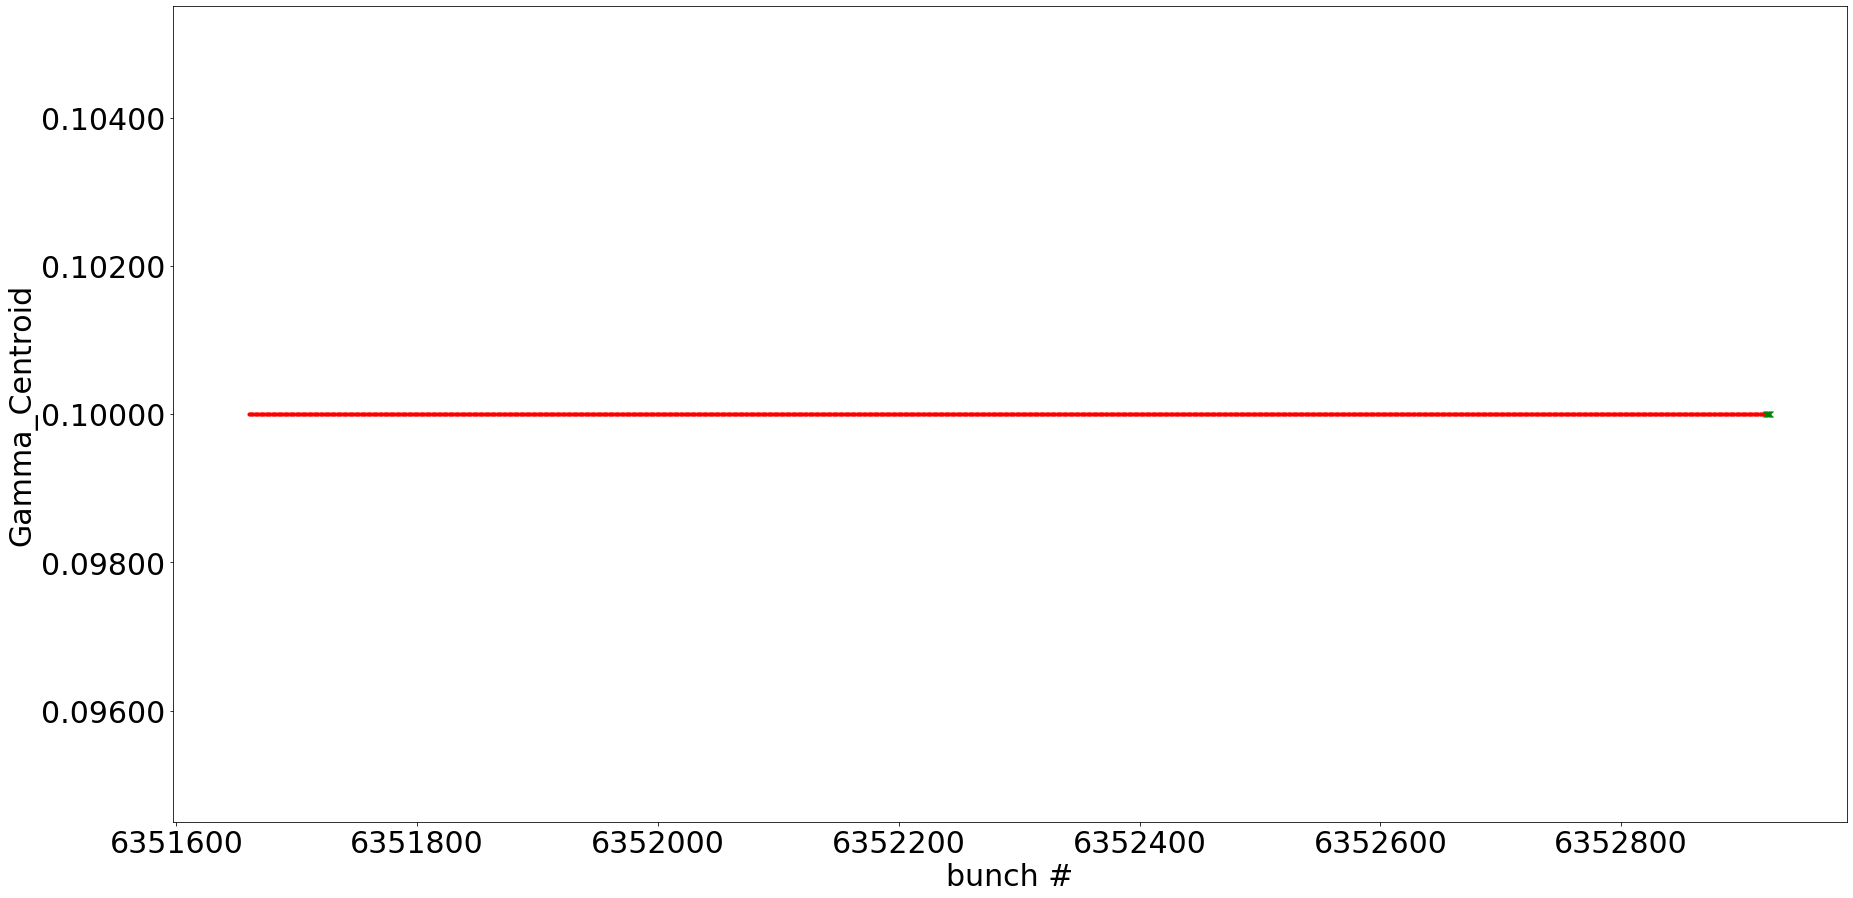

In [120]:
turn_display = 5041
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*1
rng3= rng2+5#nBunch*1
fig1,axes1 = plt.subplots(1,1)
axes1.plot(turns[rng1:rng2],np.array(M1_2[rng1:rng2]),'r.-')
axes1.plot(turns[rng2:rng3],np.array(M1_2[rng2:rng3]),'gx-')

fig1.set_figheight(15)
fig1.set_figwidth(30)

axes1.set_xlabel('bunch #',fontsize=30)
axes1.set_ylabel('Gamma_Centroid',fontsize=30)
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))
#fn_Ipeak = os.path.join(cwd,'Ipeak.jpg')
#plt.savefig(fn_Ipeak,bbox_inches='tight')
plt.show()

In [89]:
sin0 = np.sin(0*2*pi*f0*np.array(centroids))
cos0 = np.cos(0*2*pi*f0*np.array(centroids))
sin1 = np.sin(1*2*pi*f0*np.array(centroids))
cos1 = np.cos(1*2*pi*f0*np.array(centroids))
a0 = []
b0 = []
c0 = []
a1 = []
b1 = []
c1 = []
for i in range(nTurns):
    a0.append(np.sum(sin0*M1_2[i*nBunch:(i+1)*nBunch])/len(sin0))
    b0.append(np.sum(cos0*M1_2[i*nBunch:(i+1)*nBunch])/len(sin0))
    a1.append(np.sum(sin1*M1_2[i*nBunch:(i+1)*nBunch])/len(sin1))
    b1.append(np.sum(cos1*M1_2[i*nBunch:(i+1)*nBunch])/len(sin1))
c0 = np.array(a0)**2+np.array(b0)**2
c1 = np.array(a1)**2+np.array(b1)**2

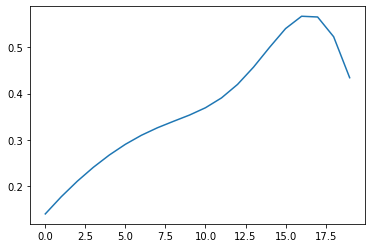

In [90]:
plt.plot(np.sqrt(c0)[5000:5020])

In [91]:
tau0 = T0/np.log(np.sqrt(c0)[5026]/np.sqrt(c0)[5025])
print(tau0)
print("OMEGA_Im : ",1/tau0)

2.415103247300394e-05
OMEGA_Im :  41406.09728042896


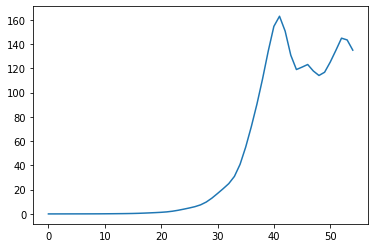

In [92]:
plt.plot(np.sqrt(c1)[5000:5055])

In [93]:
tau = 10*T0/np.log(np.sqrt(c1)[5030]/np.sqrt(c1)[5020])
print(tau)
print("OMEGA_Im : ",1/tau)

5.032119213719549e-05
OMEGA_Im :  19872.34319237915


In [144]:
tau = 10*T0/np.log(np.sqrt(c1)[5035]/np.sqrt(c1)[5025])
print(tau*1e3,"ms")
print("OMEGA_Im : ",1/tau)

0.05282740801405836 ms
OMEGA_Im :  18929.56776781252


In [95]:
tau-1/(Qs*f0)*Ek_damp

-6.523839177611498e-05

In [71]:
tau

5.2827408314169674e-05

In [74]:
(Qs*f0)/Ek_damp

8469.8532663752

In [75]:
1/(Qs*f0)*Ek_damp

0.00011806579979017334

In [9]:
# get info of all variables
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.5f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:20]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                          test: 1.18497 GiB
                          time: 190.33823 MiB
                           Ibi: 190.33823 MiB
                          Ibi2: 190.33823 MiB
                     emittance: 984.46875 KiB
                            dt: 984.46875 KiB
                         gamma: 984.46875 KiB
             bucket_lower_lim3: 984.46875 KiB
             bucket_upper_lim3: 984.46875 KiB
                       dt_mask: 984.46875 KiB
                    gamma_mask: 984.46875 KiB
                           t_0: 984.46875 KiB
                       gamma_0: 984.46875 KiB
                     nPar_mask: 984.46875 KiB
                         sig_t: 984.46875 KiB
                     sig_gamma: 984.46875 KiB
                   sig_t_gamma: 984.46875 KiB
                          mask: 123.14062 KiB
                           Zs0: 39.48438 KiB
                           Zs1: 39.48438 KiB


In [116]:
# testing the formula for Ig with loading angle thetaL
thetaL = -20/180*pi
Phis = 81.88537662536568/180*pi
IbRF = IbDC*2
Vc = 1692857.1428571427
Rsh = 73*30533.268101761252

tgPhi = (1+IbRF*np.cos(Phis)/(Vc/Rsh))*np.tan(thetaL)+IbRF/(Vc/Rsh)*np.sin(Phis)

Ig = Vc/(Rsh)*np.cos(thetaL)*(1+np.tan(thetaL)*tgPhi)+IbRF*(np.cos(Phis)*np.cos(thetaL))*(1-np.tan(thetaL)*np.tan(Phis))
Ig_Gab = Vc/np.cos(thetaL)*(1+IbRF/(Vc/Rsh)*np.cos(Phis))/Rsh

print("Tan(Phi) = ",tgPhi)
print("Detune angle = ",np.arctan(tgPhi)/pi*180)
print("Ig magnitude = ",Ig)
print("Ig_Gab magnitude = ",Ig_Gab)


Tan(Phi) =  6.3379149062287095
Detune angle =  81.03375413314149
Ig magnitude =  1.6228321406590989
Ig_Gab magnitude =  1.6228321406590998


In [100]:
I_g

17.780006958816216

In [106]:
Vnew/Rsh/np.cos(thetaL)*(1+np.tan(thetaL)*tgPhi)+IbDC*2*(np.cos(PhisPhasorNew)*np.cos(thetaL))*(1-np.tan(thetaL)*np.tan(PhisPhasorNew))

1.0693114641756685

In [102]:
Vnew

1692857.1428571427

In [103]:
Vnew/Rsh/np.cos(thetaL)*(1+np.tan(thetaL)*tgPhi)

-1.4861803806568434

In [107]:
IbDC*2*(np.cos(PhisPhasorNew)*np.cos(thetaL))*(1-np.tan(thetaL)*np.tan(PhisPhasorNew))

2.555491844832512

In [109]:
PhisPhasorNew/pi*180

81.88537662536568

In [123]:
1/np.cos(15/180*pi)

1.035276180410083

In [132]:
frf = f0*h[0]
dphi = 2*pi*18.8e3*100*6/frf

In [140]:
dt = dphi/2/pi/frf
dt*1e9

0.03227700501278364

In [141]:
dt*3e8*100

0.9683101503835091